In [1]:
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
from scipy.fft import fft
%matplotlib inline

parent_dir = os.path.abspath(r'D:')

##If using gitLab following parent_dir 

#parent_dir = os.path.abspath(r'../data/')

output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')

big_train_path = os.path.join(output_dir, 'big_train.parquet')
big_train_df = pd.read_parquet(big_train_path)

big_test_path = os.path.join(output_dir, 'big_test.parquet')
big_test_df = pd.read_parquet(big_test_path)



In [ ]:
import os
import pandas as pd

parent_dir_param = None  # Set this parameter when running the notebook

if parent_dir_param is None:
    parent_dir = os.path.abspath(r'../data/')
else:
    parent_dir = os.path.abspath(parent_dir_param)

output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')

big_train_path = os.path.join(output_dir, 'big_train.parquet')
big_train_df = pd.read_parquet(big_train_path)

big_test_path = os.path.join(output_dir, 'big_test.parquet')
big_test_df = pd.read_parquet(big_test_path)

raw_data_dir = os.path.join(parent_dir, 'raw')
processed_data_dir = os.path.join(parent_dir, 'processed_data')
concatenated_yaws_dir = os.path.join(parent_dir, 'Concatenated_Yaws')


In [3]:
columns_to_drop = [
    'wind_speed_mean', 'yaw_error_mean', 'Turbulence',
    'tip_deflection_edge_V1_mean', 'tip_deflection_edge_V2_mean',
    'tip_deflection_edge_V3_mean', 'tip_deflection_flap_V1_mean',
    'tip_deflection_flap_V2_mean', 'tip_deflection_flap_V3_mean',
    'tower_deflection_Y_mean', 'tower_deflection_Z_mean',
    'wind_speed_max', 'wind_speed_median', 'wind_speed_min',
    'wind_speed_q1', 'wind_speed_q3', 'wind_speed_std',
    'yaw_error_max', 'yaw_error_median', 'yaw_error_min',
    'yaw_error_q1', 'yaw_error_q3', 'yaw_error_std',
    'tip_deflection_edge_V1_max', 'tip_deflection_edge_V1_median',
    'tip_deflection_edge_V1_min', 'tip_deflection_edge_V1_q1',
    'tip_deflection_edge_V1_q3', 'tip_deflection_edge_V1_std',
    'tip_deflection_edge_V2_max', 'tip_deflection_edge_V2_median',
    'tip_deflection_edge_V2_min', 'tip_deflection_edge_V2_q1',
    'tip_deflection_edge_V2_q3', 'tip_deflection_edge_V2_std',
    'tip_deflection_edge_V3_max', 'tip_deflection_edge_V3_median',
    'tip_deflection_edge_V3_min', 'tip_deflection_edge_V3_q1',
    'tip_deflection_edge_V3_q3', 'tip_deflection_edge_V3_std',
    'tip_deflection_flap_V1_max', 'tip_deflection_flap_V1_median',
    'tip_deflection_flap_V1_min', 'tip_deflection_flap_V1_q1',
    'tip_deflection_flap_V1_q3', 'tip_deflection_flap_V1_std',
    'tip_deflection_flap_V2_max', 'tip_deflection_flap_V2_median',
    'tip_deflection_flap_V2_min', 'tip_deflection_flap_V2_q1',
    'tip_deflection_flap_V2_q3', 'tip_deflection_flap_V2_std',
    'tip_deflection_flap_V3_max', 'tip_deflection_flap_V3_median',
    'tip_deflection_flap_V3_min', 'tip_deflection_flap_V3_q1',
    'tip_deflection_flap_V3_q3', 'tip_deflection_flap_V3_std',
    'tower_deflection_Y_max', 'tower_deflection_Y_median',
    'tower_deflection_Y_min', 'tower_deflection_Y_q1',
    'tower_deflection_Y_q3', 'tower_deflection_Y_std',
    'tower_deflection_Z_max', 'tower_deflection_Z_median',
    'tower_deflection_Z_min', 'tower_deflection_Z_q1',
    'tower_deflection_Z_q3', 'tower_deflection_Z_std'
]

In [4]:
def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y


In [5]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

Learning rate set to 0.078607
0:	learn: 5.7809694	total: 99.1ms	remaining: 1m 39s
1:	learn: 5.3427035	total: 118ms	remaining: 58.7s
2:	learn: 4.9371671	total: 134ms	remaining: 44.7s
3:	learn: 4.5631663	total: 152ms	remaining: 37.8s
4:	learn: 4.2182573	total: 169ms	remaining: 33.7s
5:	learn: 3.8993114	total: 187ms	remaining: 31s
6:	learn: 3.6058292	total: 206ms	remaining: 29.2s
7:	learn: 3.3350782	total: 222ms	remaining: 27.5s
8:	learn: 3.0847072	total: 237ms	remaining: 26.1s
9:	learn: 2.8536948	total: 252ms	remaining: 25s
10:	learn: 2.6427225	total: 268ms	remaining: 24.1s
11:	learn: 2.4463476	total: 283ms	remaining: 23.3s
12:	learn: 2.2667438	total: 299ms	remaining: 22.7s
13:	learn: 2.0999125	total: 314ms	remaining: 22.1s
14:	learn: 1.9462112	total: 329ms	remaining: 21.6s
15:	learn: 1.8068462	total: 344ms	remaining: 21.2s
16:	learn: 1.6766948	total: 360ms	remaining: 20.8s
17:	learn: 1.5563864	total: 376ms	remaining: 20.5s
18:	learn: 1.4452677	total: 392ms	remaining: 20.2s
19:	learn: 1.

160:	learn: 0.2695435	total: 2.45s	remaining: 12.8s
161:	learn: 0.2688060	total: 2.47s	remaining: 12.8s
162:	learn: 0.2680800	total: 2.48s	remaining: 12.7s
163:	learn: 0.2676637	total: 2.5s	remaining: 12.7s
164:	learn: 0.2671866	total: 2.51s	remaining: 12.7s
165:	learn: 0.2663724	total: 2.52s	remaining: 12.7s
166:	learn: 0.2660990	total: 2.54s	remaining: 12.7s
167:	learn: 0.2656833	total: 2.55s	remaining: 12.6s
168:	learn: 0.2649022	total: 2.57s	remaining: 12.6s
169:	learn: 0.2644126	total: 2.58s	remaining: 12.6s
170:	learn: 0.2638876	total: 2.6s	remaining: 12.6s
171:	learn: 0.2635167	total: 2.61s	remaining: 12.6s
172:	learn: 0.2630304	total: 2.63s	remaining: 12.5s
173:	learn: 0.2626988	total: 2.64s	remaining: 12.5s
174:	learn: 0.2621647	total: 2.65s	remaining: 12.5s
175:	learn: 0.2616072	total: 2.67s	remaining: 12.5s
176:	learn: 0.2612556	total: 2.68s	remaining: 12.5s
177:	learn: 0.2608779	total: 2.7s	remaining: 12.5s
178:	learn: 0.2603171	total: 2.71s	remaining: 12.4s
179:	learn: 0.2

328:	learn: 0.2111972	total: 4.92s	remaining: 10s
329:	learn: 0.2109322	total: 4.94s	remaining: 10s
330:	learn: 0.2105706	total: 4.96s	remaining: 10s
331:	learn: 0.2103039	total: 4.97s	remaining: 10s
332:	learn: 0.2099289	total: 4.99s	remaining: 9.98s
333:	learn: 0.2097006	total: 5s	remaining: 9.97s
334:	learn: 0.2093201	total: 5.02s	remaining: 9.96s
335:	learn: 0.2091163	total: 5.03s	remaining: 9.95s
336:	learn: 0.2088759	total: 5.05s	remaining: 9.93s
337:	learn: 0.2085380	total: 5.06s	remaining: 9.91s
338:	learn: 0.2081772	total: 5.08s	remaining: 9.9s
339:	learn: 0.2079606	total: 5.09s	remaining: 9.88s
340:	learn: 0.2077074	total: 5.1s	remaining: 9.86s
341:	learn: 0.2073564	total: 5.12s	remaining: 9.85s
342:	learn: 0.2070378	total: 5.14s	remaining: 9.84s
343:	learn: 0.2068092	total: 5.15s	remaining: 9.82s
344:	learn: 0.2065774	total: 5.16s	remaining: 9.8s
345:	learn: 0.2062444	total: 5.18s	remaining: 9.79s
346:	learn: 0.2060243	total: 5.2s	remaining: 9.78s
347:	learn: 0.2056512	total

498:	learn: 0.1771163	total: 7.37s	remaining: 7.4s
499:	learn: 0.1769198	total: 7.39s	remaining: 7.39s
500:	learn: 0.1767917	total: 7.4s	remaining: 7.37s
501:	learn: 0.1765569	total: 7.42s	remaining: 7.36s
502:	learn: 0.1764647	total: 7.43s	remaining: 7.34s
503:	learn: 0.1763087	total: 7.45s	remaining: 7.33s
504:	learn: 0.1760923	total: 7.46s	remaining: 7.32s
505:	learn: 0.1759575	total: 7.48s	remaining: 7.3s
506:	learn: 0.1757196	total: 7.49s	remaining: 7.29s
507:	learn: 0.1756172	total: 7.5s	remaining: 7.27s
508:	learn: 0.1755581	total: 7.52s	remaining: 7.25s
509:	learn: 0.1753311	total: 7.53s	remaining: 7.24s
510:	learn: 0.1752210	total: 7.55s	remaining: 7.22s
511:	learn: 0.1751446	total: 7.56s	remaining: 7.21s
512:	learn: 0.1750200	total: 7.57s	remaining: 7.19s
513:	learn: 0.1749186	total: 7.59s	remaining: 7.17s
514:	learn: 0.1748173	total: 7.6s	remaining: 7.16s
515:	learn: 0.1745600	total: 7.62s	remaining: 7.14s
516:	learn: 0.1744459	total: 7.63s	remaining: 7.13s
517:	learn: 0.174

667:	learn: 0.1552068	total: 9.84s	remaining: 4.89s
668:	learn: 0.1551506	total: 9.85s	remaining: 4.87s
669:	learn: 0.1550655	total: 9.87s	remaining: 4.86s
670:	learn: 0.1548990	total: 9.88s	remaining: 4.85s
671:	learn: 0.1547609	total: 9.9s	remaining: 4.83s
672:	learn: 0.1546604	total: 9.91s	remaining: 4.82s
673:	learn: 0.1545788	total: 9.93s	remaining: 4.8s
674:	learn: 0.1545246	total: 9.94s	remaining: 4.79s
675:	learn: 0.1544236	total: 9.95s	remaining: 4.77s
676:	learn: 0.1542032	total: 9.97s	remaining: 4.76s
677:	learn: 0.1540912	total: 9.99s	remaining: 4.74s
678:	learn: 0.1540435	total: 10s	remaining: 4.73s
679:	learn: 0.1539882	total: 10s	remaining: 4.71s
680:	learn: 0.1538667	total: 10s	remaining: 4.7s
681:	learn: 0.1537602	total: 10s	remaining: 4.68s
682:	learn: 0.1536755	total: 10.1s	remaining: 4.67s
683:	learn: 0.1535781	total: 10.1s	remaining: 4.65s
684:	learn: 0.1534975	total: 10.1s	remaining: 4.64s
685:	learn: 0.1534065	total: 10.1s	remaining: 4.62s
686:	learn: 0.1533267	t

831:	learn: 0.1394931	total: 12.3s	remaining: 2.49s
832:	learn: 0.1394008	total: 12.3s	remaining: 2.47s
833:	learn: 0.1392500	total: 12.3s	remaining: 2.46s
834:	learn: 0.1391954	total: 12.4s	remaining: 2.44s
835:	learn: 0.1391226	total: 12.4s	remaining: 2.43s
836:	learn: 0.1390404	total: 12.4s	remaining: 2.41s
837:	learn: 0.1389006	total: 12.4s	remaining: 2.4s
838:	learn: 0.1387885	total: 12.4s	remaining: 2.38s
839:	learn: 0.1387191	total: 12.4s	remaining: 2.37s
840:	learn: 0.1386425	total: 12.4s	remaining: 2.35s
841:	learn: 0.1385638	total: 12.5s	remaining: 2.34s
842:	learn: 0.1385092	total: 12.5s	remaining: 2.32s
843:	learn: 0.1383916	total: 12.5s	remaining: 2.31s
844:	learn: 0.1383131	total: 12.5s	remaining: 2.29s
845:	learn: 0.1382296	total: 12.5s	remaining: 2.28s
846:	learn: 0.1381578	total: 12.5s	remaining: 2.26s
847:	learn: 0.1380266	total: 12.6s	remaining: 2.25s
848:	learn: 0.1379605	total: 12.6s	remaining: 2.23s
849:	learn: 0.1378694	total: 12.6s	remaining: 2.22s
850:	learn: 0

992:	learn: 0.1278492	total: 14.8s	remaining: 104ms
993:	learn: 0.1277680	total: 14.8s	remaining: 89.6ms
994:	learn: 0.1277084	total: 14.9s	remaining: 74.7ms
995:	learn: 0.1276860	total: 14.9s	remaining: 59.8ms
996:	learn: 0.1276721	total: 14.9s	remaining: 44.8ms
997:	learn: 0.1275918	total: 14.9s	remaining: 29.9ms
998:	learn: 0.1275590	total: 14.9s	remaining: 15ms
999:	learn: 0.1274920	total: 15s	remaining: 0us
Target Variable: wind_speed_mean
Training MAE: 0.09535443069167444
Training MSE: 0.01625422070565114
Training RMSE: 0.12749204173457707
Training R2: 0.9995849655776887

Test MAE: 0.12902682641805405
Test MSE: 0.029669657029330936
Test RMSE: 0.17224882301290462
Test R2: 0.9992005457087902



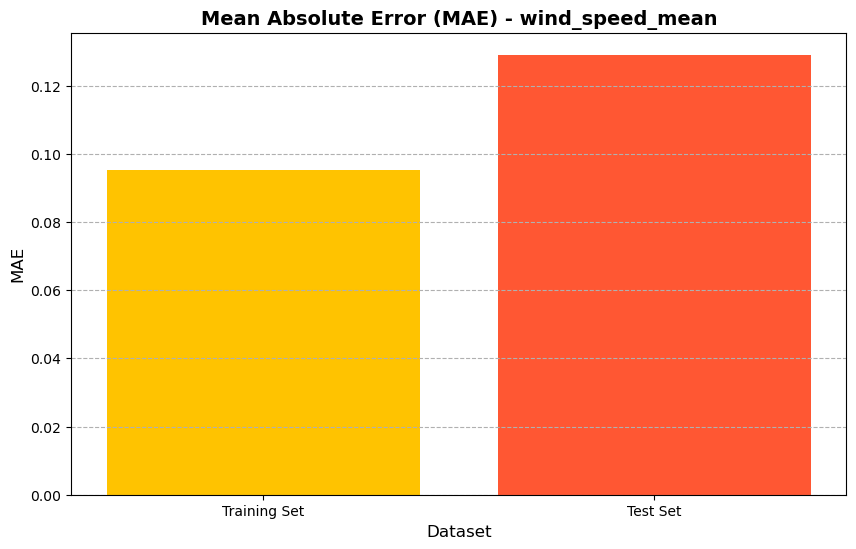

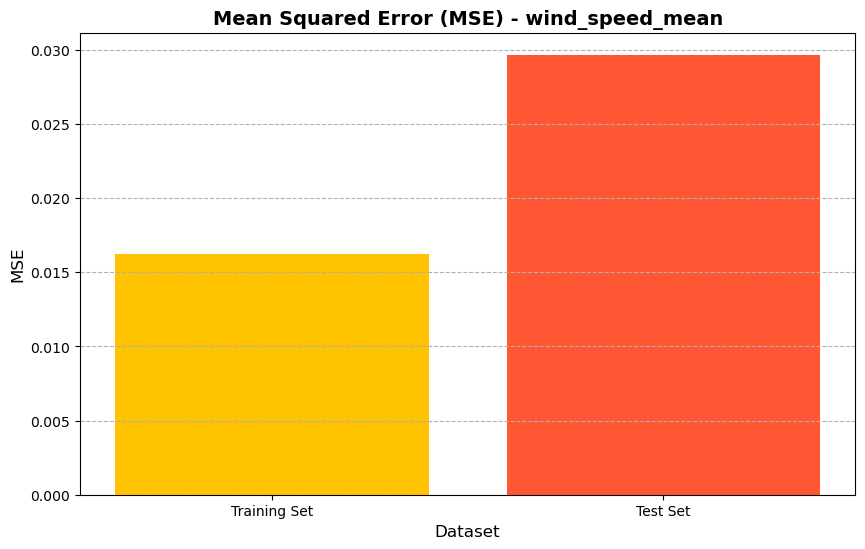

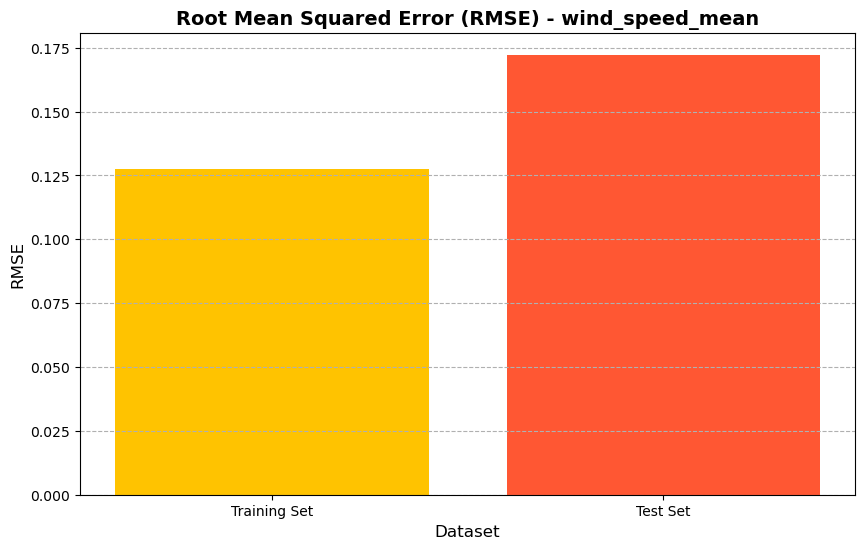

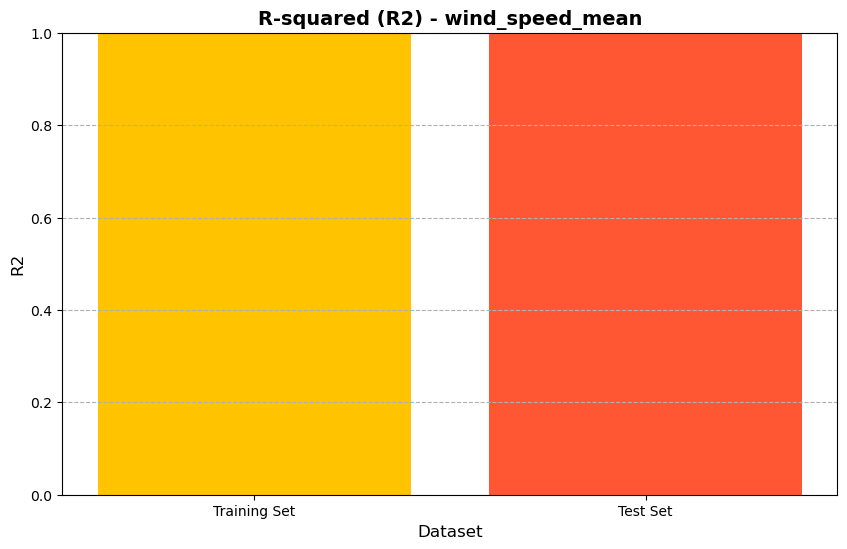

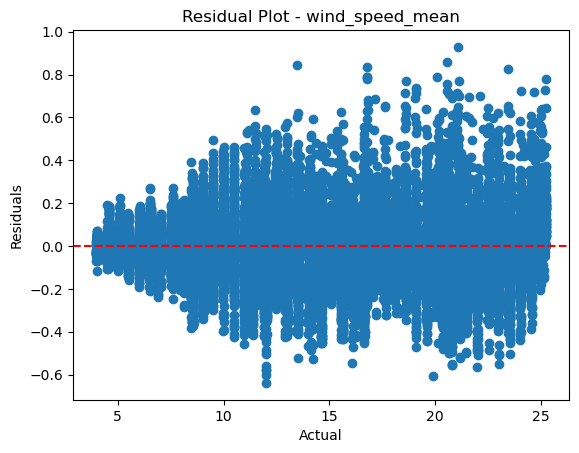

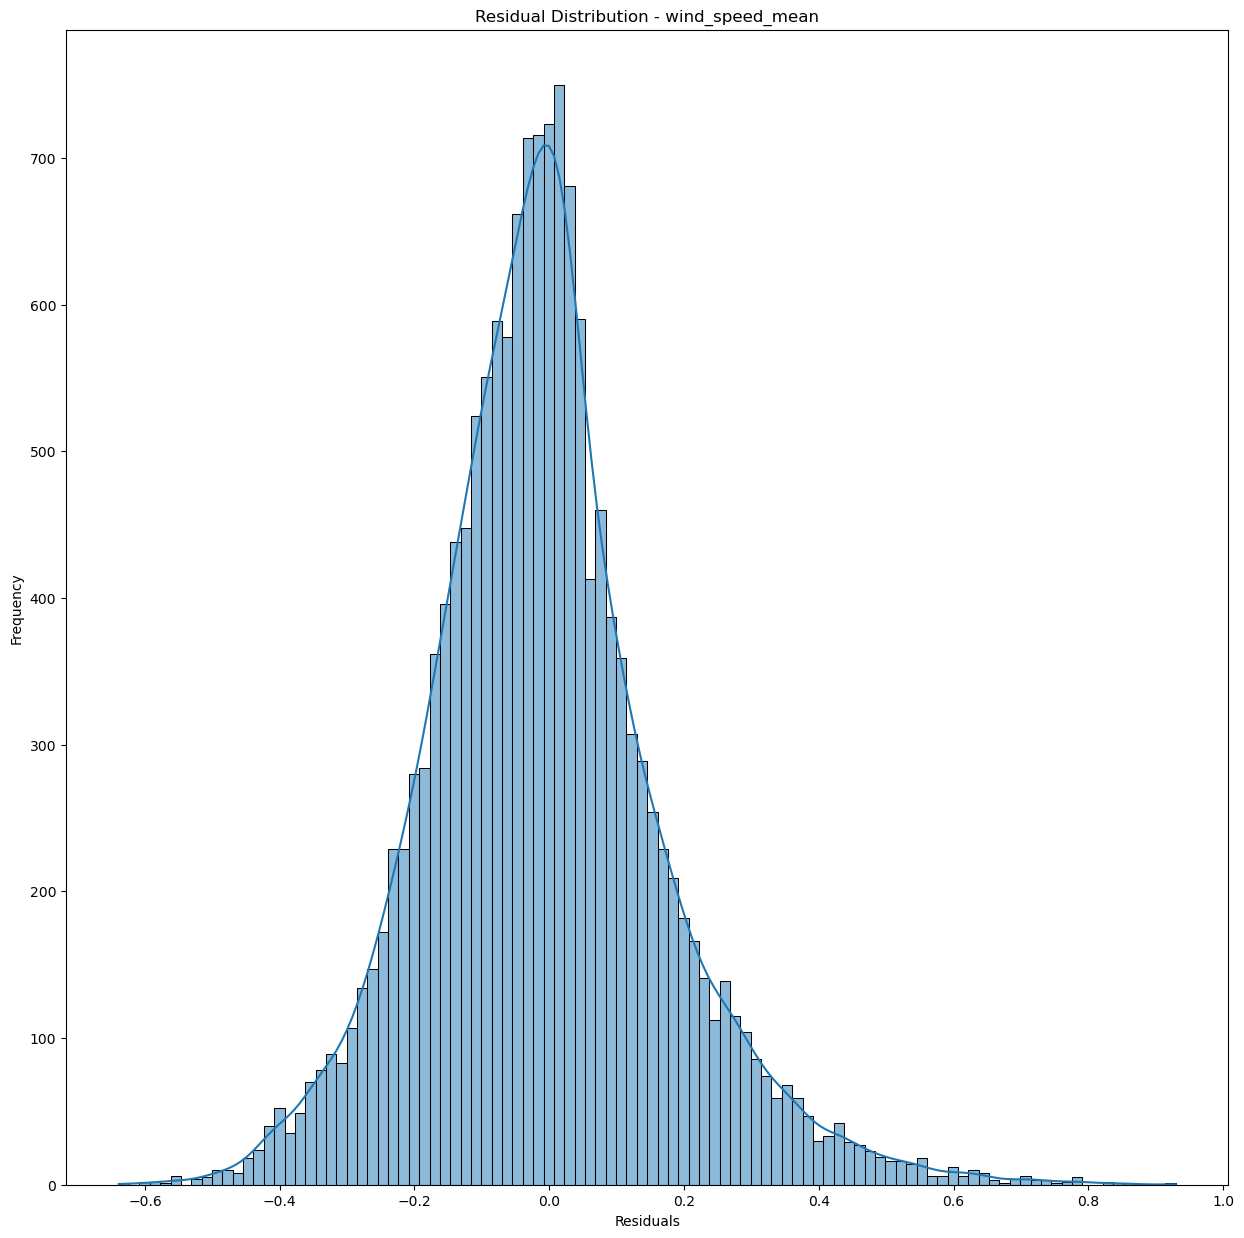

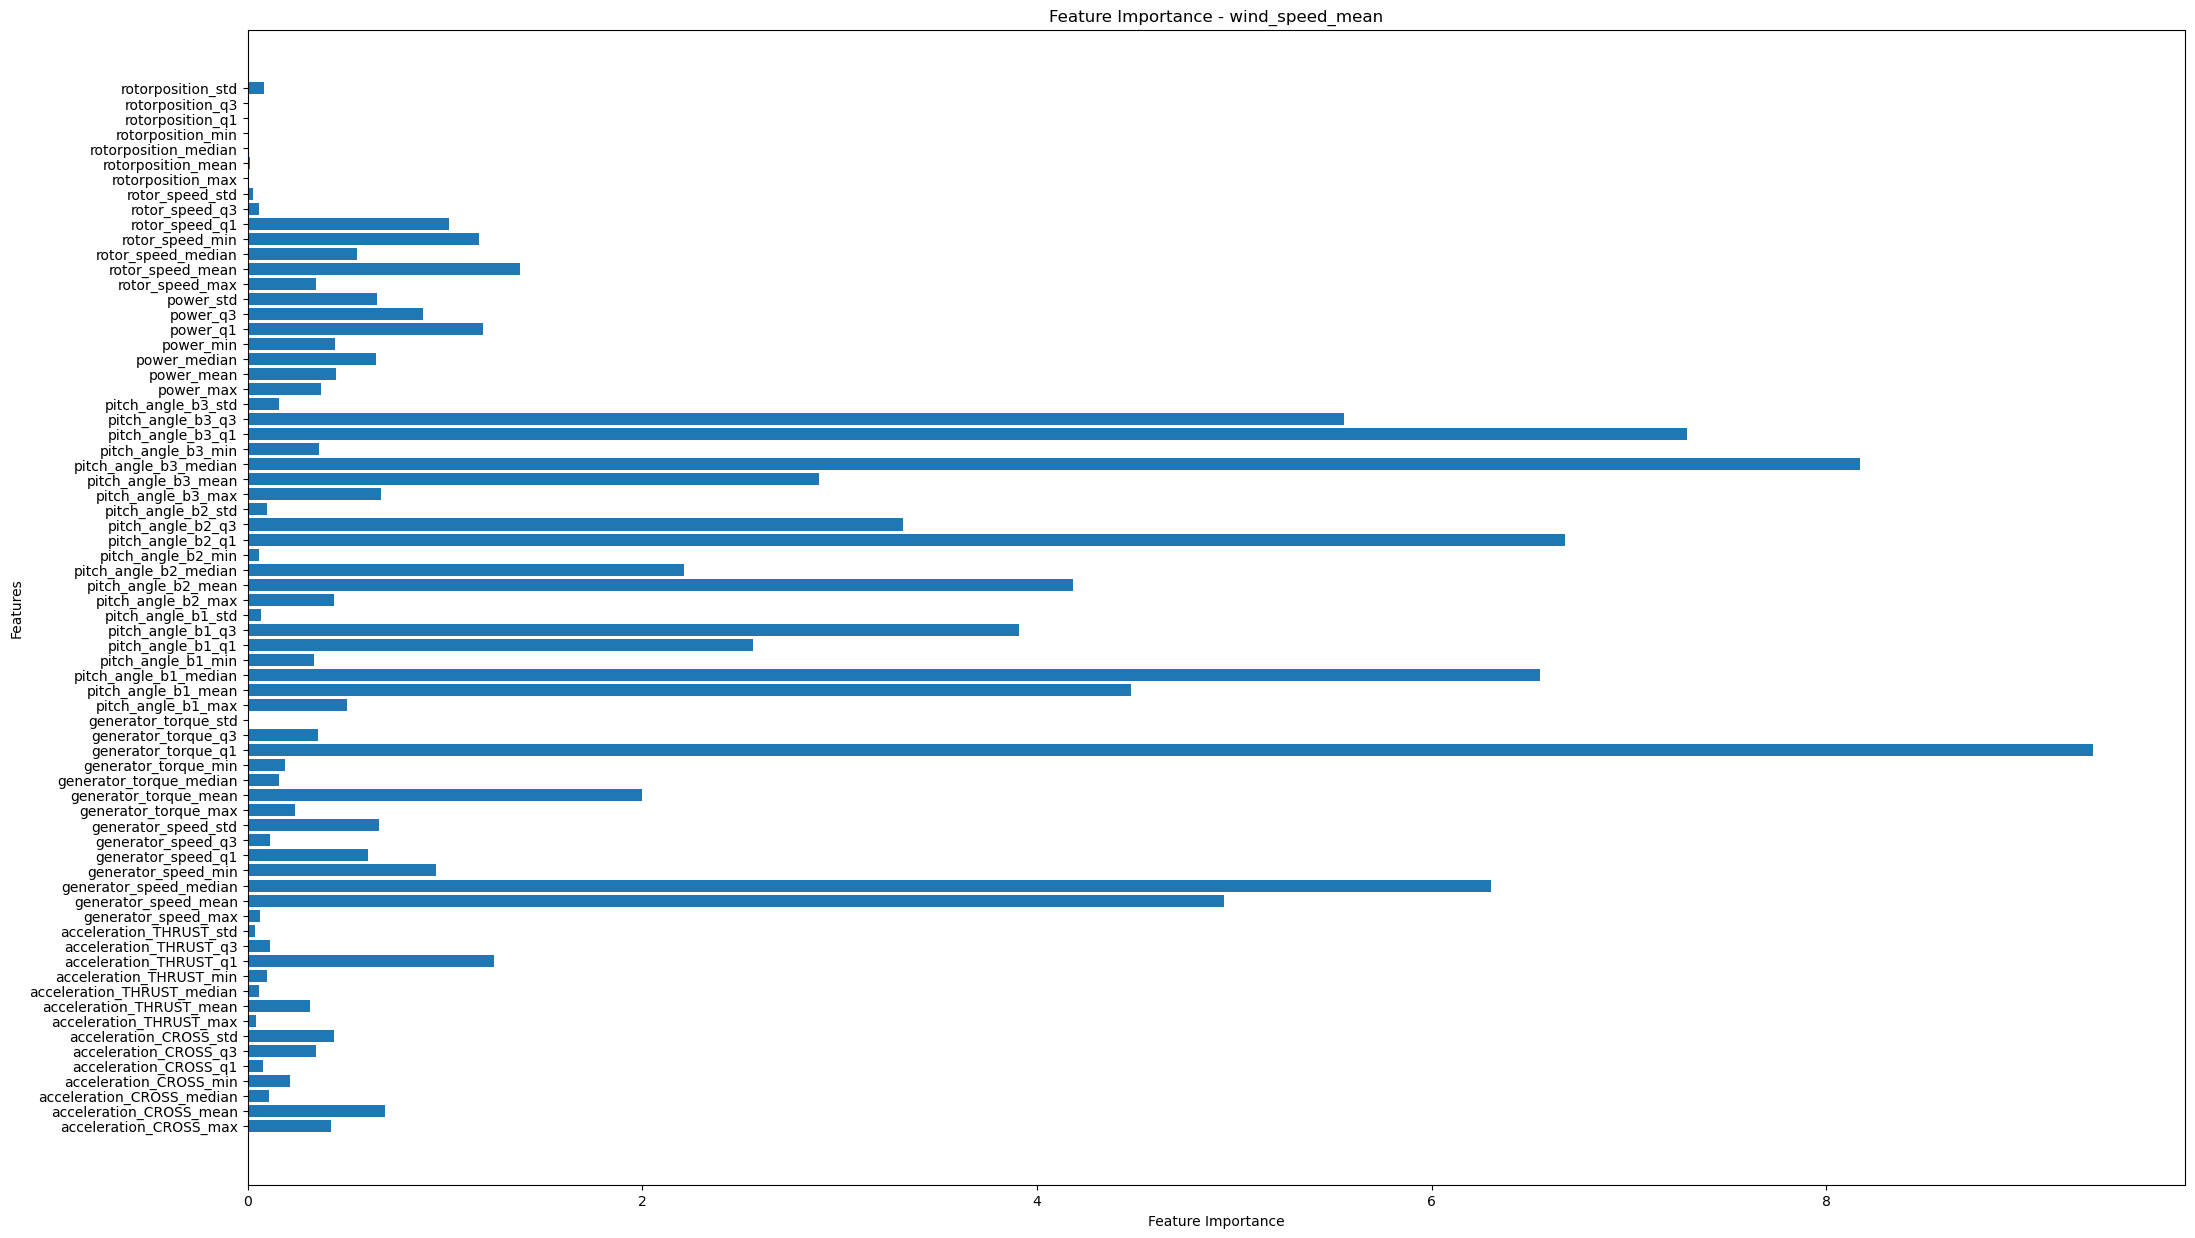

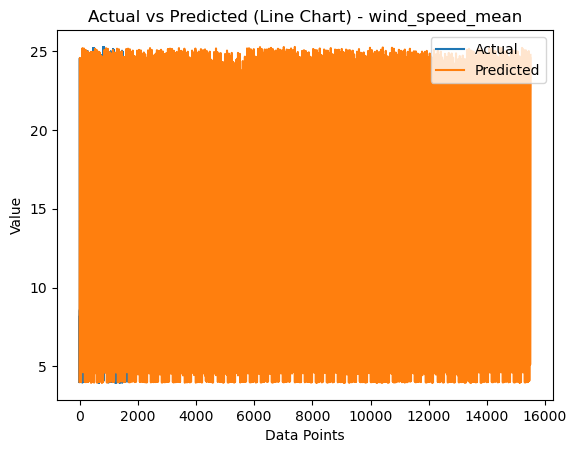

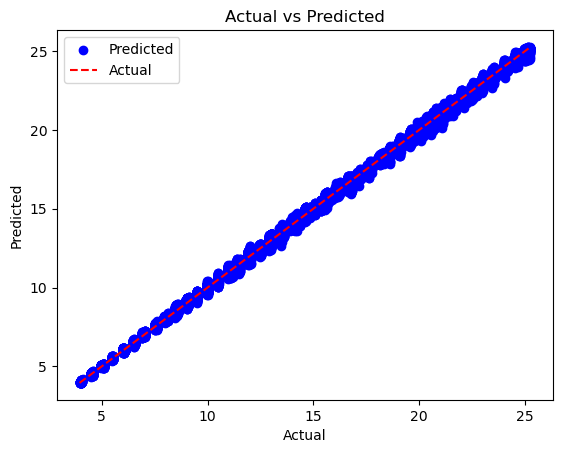

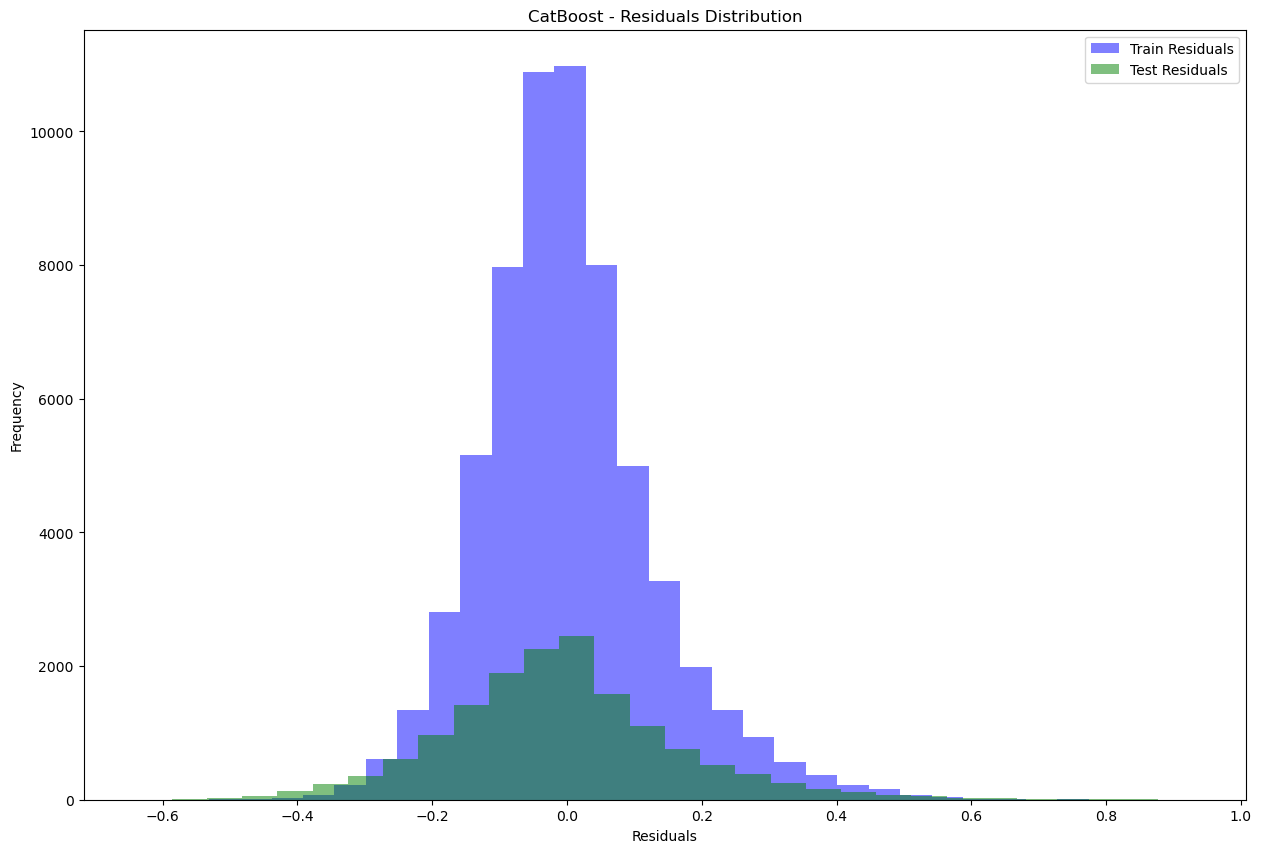

Learning rate set to 0.078607
0:	learn: 11.5878420	total: 18.4ms	remaining: 18.4s
1:	learn: 11.3527980	total: 33.3ms	remaining: 16.6s
2:	learn: 11.1469766	total: 47.3ms	remaining: 15.7s
3:	learn: 10.9661278	total: 62.3ms	remaining: 15.5s
4:	learn: 10.8065500	total: 78.5ms	remaining: 15.6s
5:	learn: 10.6617870	total: 94.2ms	remaining: 15.6s
6:	learn: 10.5327272	total: 113ms	remaining: 16s
7:	learn: 10.4151458	total: 133ms	remaining: 16.4s
8:	learn: 10.3011070	total: 149ms	remaining: 16.4s
9:	learn: 10.1964610	total: 164ms	remaining: 16.3s
10:	learn: 10.1168448	total: 179ms	remaining: 16.1s
11:	learn: 10.0243268	total: 195ms	remaining: 16.1s
12:	learn: 9.9281050	total: 208ms	remaining: 15.8s
13:	learn: 9.8504920	total: 226ms	remaining: 15.9s
14:	learn: 9.7894701	total: 240ms	remaining: 15.8s
15:	learn: 9.7305197	total: 255ms	remaining: 15.7s
16:	learn: 9.6574704	total: 271ms	remaining: 15.6s
17:	learn: 9.5939828	total: 285ms	remaining: 15.6s
18:	learn: 9.5417007	total: 299ms	remaining: 1

162:	learn: 6.7928740	total: 2.46s	remaining: 12.6s
163:	learn: 6.7819291	total: 2.47s	remaining: 12.6s
164:	learn: 6.7721925	total: 2.49s	remaining: 12.6s
165:	learn: 6.7584010	total: 2.5s	remaining: 12.6s
166:	learn: 6.7520196	total: 2.51s	remaining: 12.5s
167:	learn: 6.7429950	total: 2.53s	remaining: 12.5s
168:	learn: 6.7325959	total: 2.54s	remaining: 12.5s
169:	learn: 6.7230444	total: 2.56s	remaining: 12.5s
170:	learn: 6.7157487	total: 2.57s	remaining: 12.5s
171:	learn: 6.7085887	total: 2.58s	remaining: 12.4s
172:	learn: 6.6998443	total: 2.59s	remaining: 12.4s
173:	learn: 6.6909359	total: 2.61s	remaining: 12.4s
174:	learn: 6.6859256	total: 2.62s	remaining: 12.4s
175:	learn: 6.6774756	total: 2.63s	remaining: 12.3s
176:	learn: 6.6685413	total: 2.65s	remaining: 12.3s
177:	learn: 6.6605330	total: 2.66s	remaining: 12.3s
178:	learn: 6.6540733	total: 2.67s	remaining: 12.3s
179:	learn: 6.6475502	total: 2.69s	remaining: 12.3s
180:	learn: 6.6377938	total: 2.71s	remaining: 12.3s
181:	learn: 6

332:	learn: 5.7011998	total: 4.93s	remaining: 9.87s
333:	learn: 5.6969638	total: 4.94s	remaining: 9.85s
334:	learn: 5.6933140	total: 4.95s	remaining: 9.83s
335:	learn: 5.6895729	total: 4.97s	remaining: 9.81s
336:	learn: 5.6847582	total: 4.98s	remaining: 9.8s
337:	learn: 5.6812654	total: 5s	remaining: 9.78s
338:	learn: 5.6744493	total: 5.01s	remaining: 9.77s
339:	learn: 5.6682842	total: 5.03s	remaining: 9.76s
340:	learn: 5.6648530	total: 5.04s	remaining: 9.74s
341:	learn: 5.6598327	total: 5.05s	remaining: 9.72s
342:	learn: 5.6567384	total: 5.07s	remaining: 9.71s
343:	learn: 5.6508866	total: 5.08s	remaining: 9.69s
344:	learn: 5.6440780	total: 5.1s	remaining: 9.68s
345:	learn: 5.6397408	total: 5.11s	remaining: 9.66s
346:	learn: 5.6346973	total: 5.13s	remaining: 9.65s
347:	learn: 5.6307068	total: 5.14s	remaining: 9.63s
348:	learn: 5.6272224	total: 5.16s	remaining: 9.62s
349:	learn: 5.6211198	total: 5.17s	remaining: 9.6s
350:	learn: 5.6175155	total: 5.18s	remaining: 9.59s
351:	learn: 5.6109

502:	learn: 5.0595077	total: 7.39s	remaining: 7.3s
503:	learn: 5.0554548	total: 7.4s	remaining: 7.29s
504:	learn: 5.0537681	total: 7.42s	remaining: 7.27s
505:	learn: 5.0505739	total: 7.43s	remaining: 7.25s
506:	learn: 5.0481152	total: 7.44s	remaining: 7.24s
507:	learn: 5.0446039	total: 7.46s	remaining: 7.22s
508:	learn: 5.0409039	total: 7.47s	remaining: 7.21s
509:	learn: 5.0380161	total: 7.49s	remaining: 7.2s
510:	learn: 5.0340128	total: 7.5s	remaining: 7.18s
511:	learn: 5.0314090	total: 7.52s	remaining: 7.16s
512:	learn: 5.0275537	total: 7.53s	remaining: 7.15s
513:	learn: 5.0238899	total: 7.54s	remaining: 7.13s
514:	learn: 5.0213449	total: 7.56s	remaining: 7.12s
515:	learn: 5.0187812	total: 7.57s	remaining: 7.1s
516:	learn: 5.0158364	total: 7.59s	remaining: 7.09s
517:	learn: 5.0123861	total: 7.6s	remaining: 7.07s
518:	learn: 5.0092126	total: 7.62s	remaining: 7.06s
519:	learn: 5.0052851	total: 7.63s	remaining: 7.04s
520:	learn: 5.0019503	total: 7.64s	remaining: 7.03s
521:	learn: 4.9997

668:	learn: 4.6185853	total: 9.89s	remaining: 4.89s
669:	learn: 4.6157004	total: 9.91s	remaining: 4.88s
670:	learn: 4.6138812	total: 9.92s	remaining: 4.87s
671:	learn: 4.6106790	total: 9.94s	remaining: 4.85s
672:	learn: 4.6087944	total: 9.95s	remaining: 4.84s
673:	learn: 4.6063357	total: 9.97s	remaining: 4.82s
674:	learn: 4.6039574	total: 9.98s	remaining: 4.81s
675:	learn: 4.6026151	total: 10s	remaining: 4.79s
676:	learn: 4.5997890	total: 10s	remaining: 4.78s
677:	learn: 4.5971421	total: 10s	remaining: 4.76s
678:	learn: 4.5931510	total: 10.1s	remaining: 4.75s
679:	learn: 4.5905185	total: 10.1s	remaining: 4.74s
680:	learn: 4.5873904	total: 10.1s	remaining: 4.72s
681:	learn: 4.5861595	total: 10.1s	remaining: 4.71s
682:	learn: 4.5829325	total: 10.1s	remaining: 4.7s
683:	learn: 4.5804474	total: 10.1s	remaining: 4.68s
684:	learn: 4.5775747	total: 10.2s	remaining: 4.67s
685:	learn: 4.5742045	total: 10.2s	remaining: 4.65s
686:	learn: 4.5722075	total: 10.2s	remaining: 4.64s
687:	learn: 4.56873

830:	learn: 4.2768977	total: 12.6s	remaining: 2.55s
831:	learn: 4.2749708	total: 12.6s	remaining: 2.54s
832:	learn: 4.2727382	total: 12.6s	remaining: 2.53s
833:	learn: 4.2712198	total: 12.6s	remaining: 2.51s
834:	learn: 4.2689933	total: 12.6s	remaining: 2.5s
835:	learn: 4.2669336	total: 12.7s	remaining: 2.48s
836:	learn: 4.2647867	total: 12.7s	remaining: 2.47s
837:	learn: 4.2628959	total: 12.7s	remaining: 2.46s
838:	learn: 4.2608662	total: 12.8s	remaining: 2.45s
839:	learn: 4.2587854	total: 12.8s	remaining: 2.43s
840:	learn: 4.2571119	total: 12.8s	remaining: 2.42s
841:	learn: 4.2559309	total: 12.8s	remaining: 2.4s
842:	learn: 4.2537843	total: 12.8s	remaining: 2.39s
843:	learn: 4.2522526	total: 12.9s	remaining: 2.38s
844:	learn: 4.2490132	total: 12.9s	remaining: 2.36s
845:	learn: 4.2464671	total: 12.9s	remaining: 2.35s
846:	learn: 4.2446423	total: 12.9s	remaining: 2.33s
847:	learn: 4.2430118	total: 12.9s	remaining: 2.32s
848:	learn: 4.2416387	total: 13s	remaining: 2.3s
849:	learn: 4.239

999:	learn: 4.0008280	total: 15.3s	remaining: 0us
Target Variable: yaw_error_mean
Training MAE: 2.6878120993325525
Training MSE: 16.006625005824173
Training RMSE: 4.000828040021737
Training R2: 0.8856854880711238

Test MAE: 3.623714629825506
Test MSE: 27.89432768455699
Test RMSE: 5.281508088089707
Test R2: 0.8007802804266966



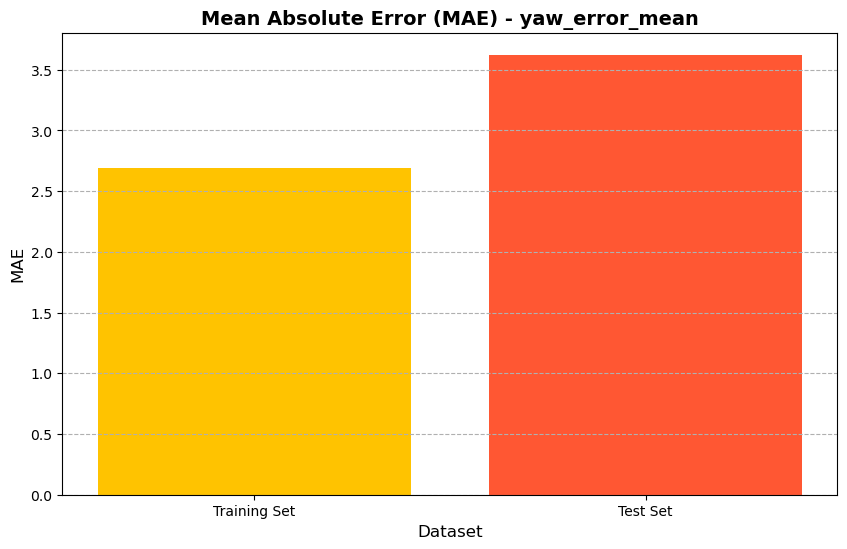

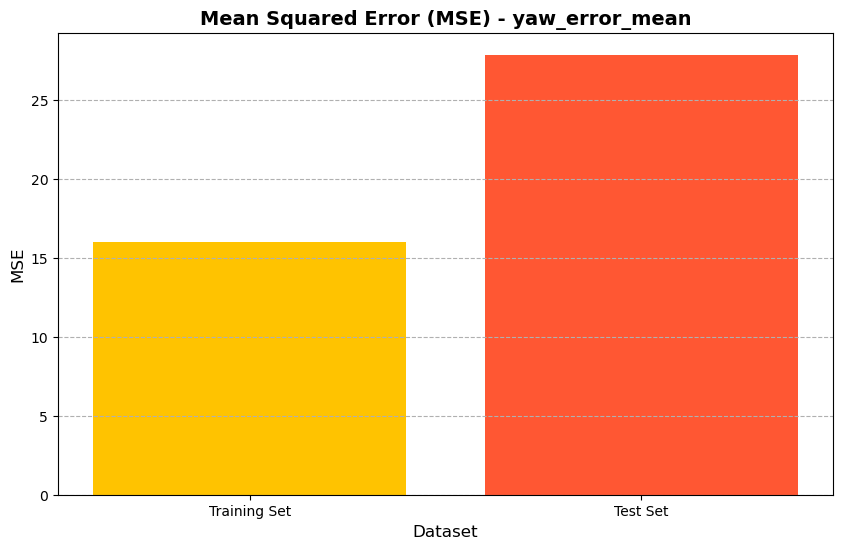

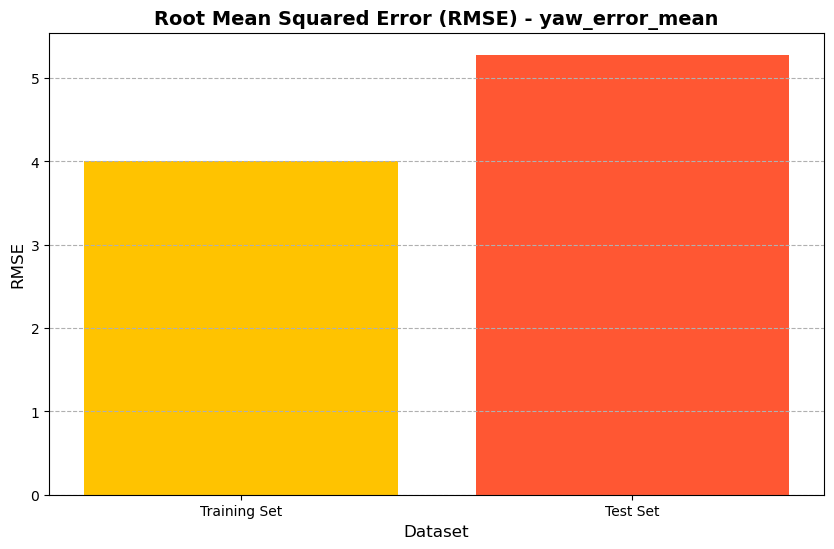

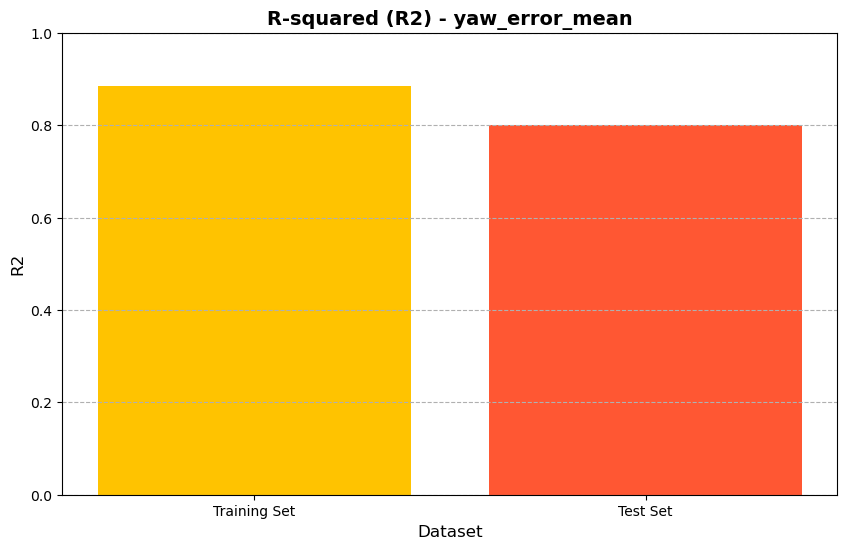

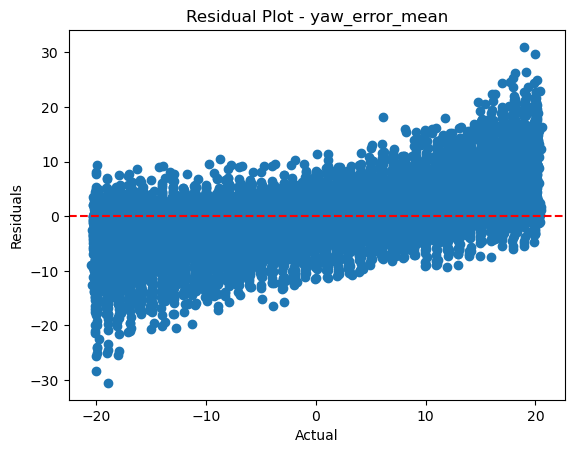

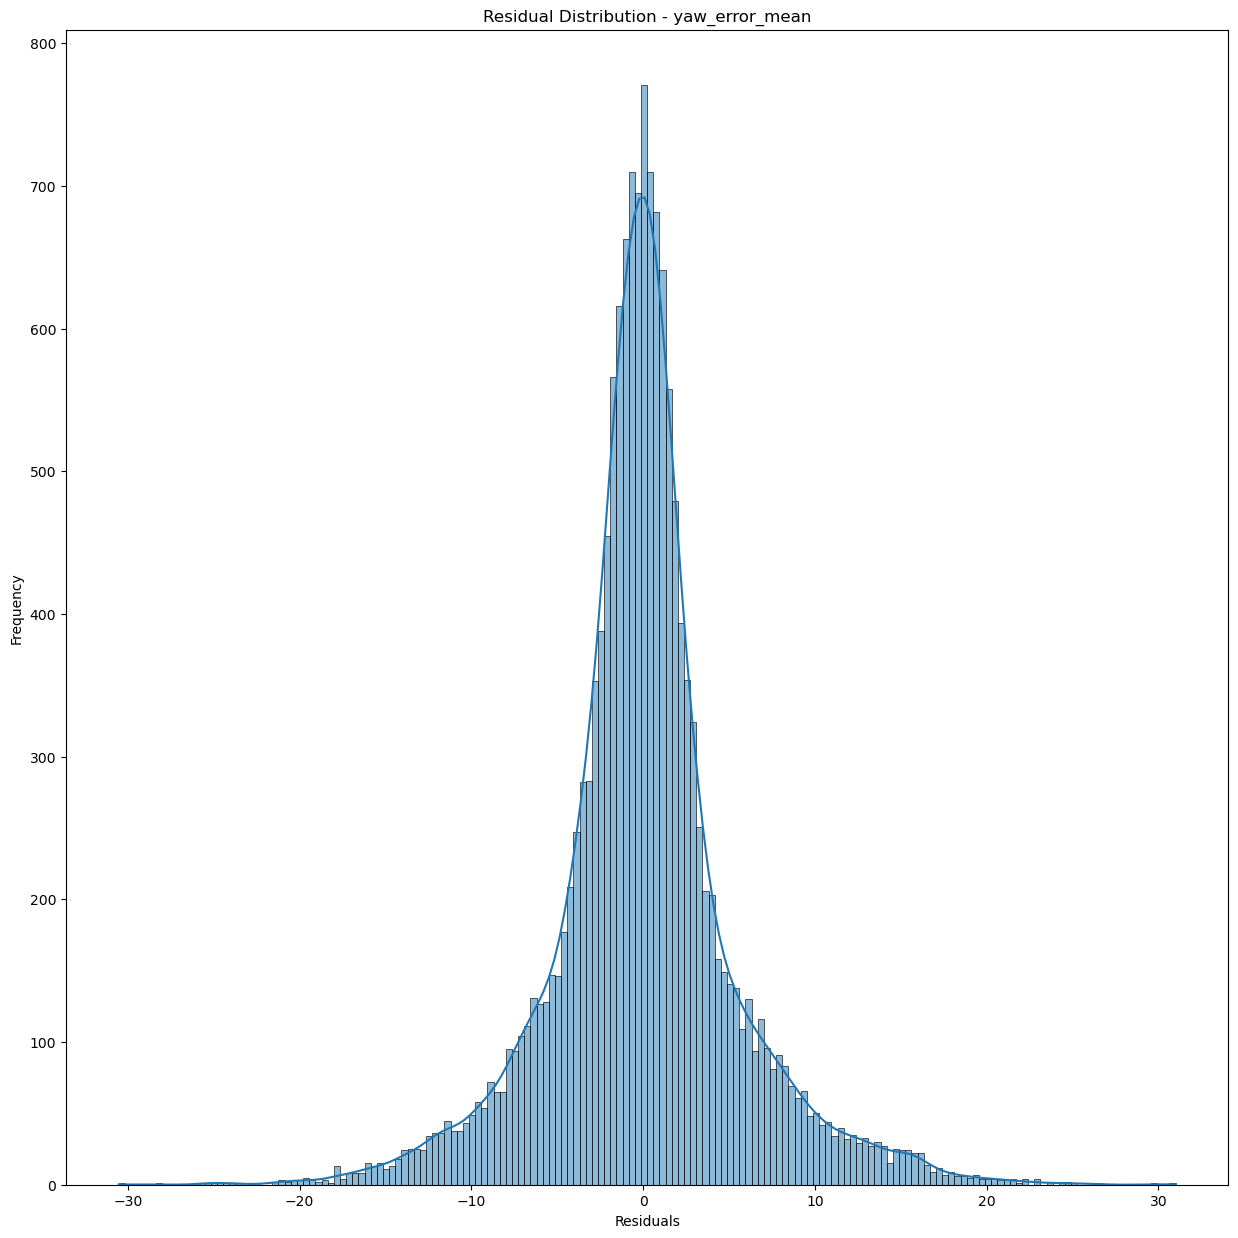

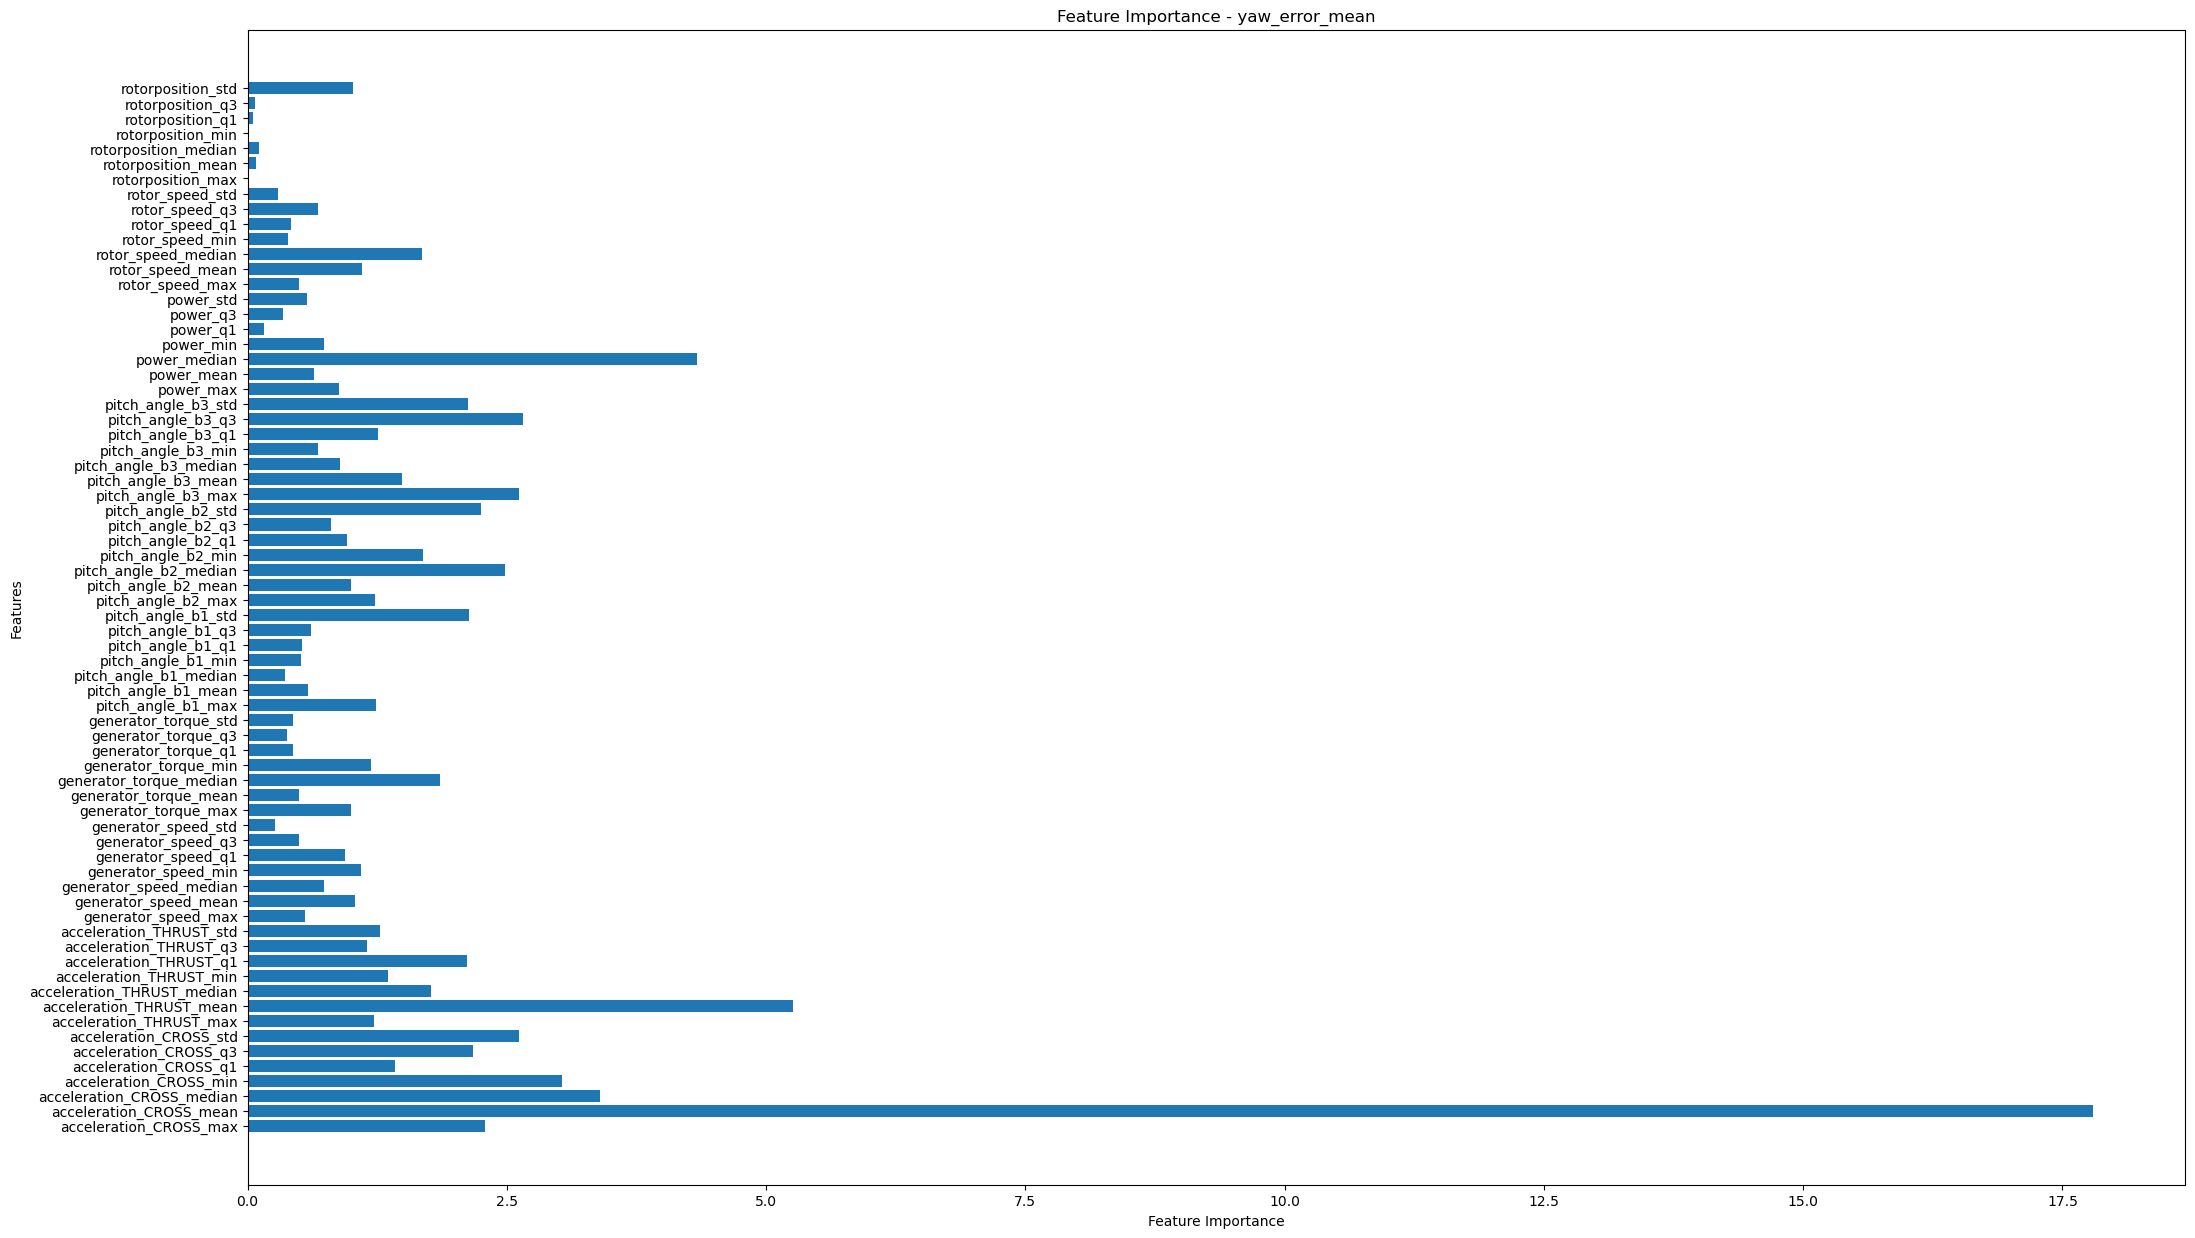

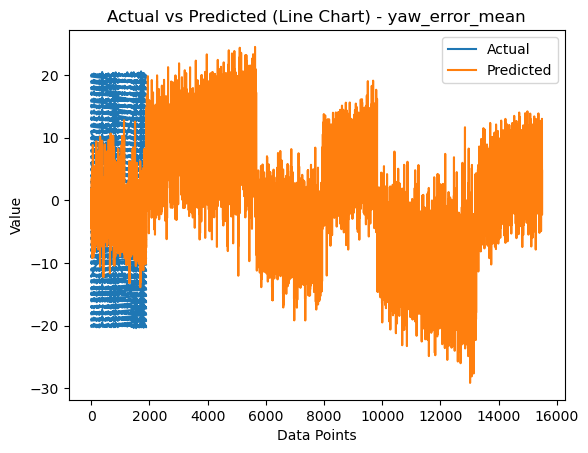

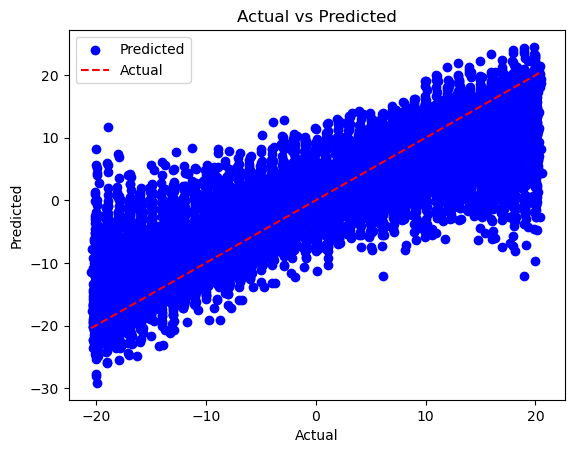

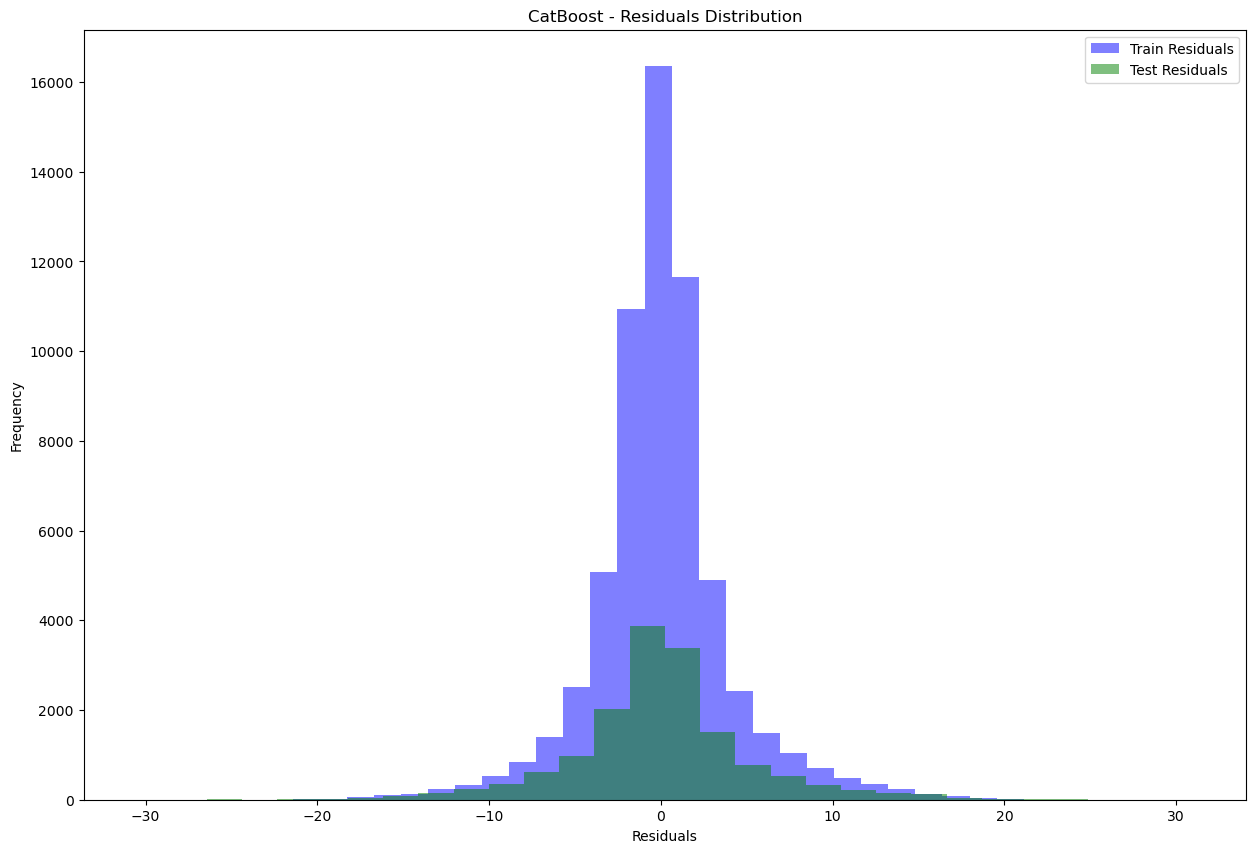

Learning rate set to 0.078607
0:	learn: 0.0264329	total: 17.6ms	remaining: 17.6s
1:	learn: 0.0250422	total: 33.7ms	remaining: 16.8s
2:	learn: 0.0237404	total: 49.5ms	remaining: 16.5s
3:	learn: 0.0225765	total: 64.3ms	remaining: 16s
4:	learn: 0.0214734	total: 79.6ms	remaining: 15.8s
5:	learn: 0.0204200	total: 94.4ms	remaining: 15.6s
6:	learn: 0.0194469	total: 109ms	remaining: 15.5s
7:	learn: 0.0185788	total: 123ms	remaining: 15.2s
8:	learn: 0.0177013	total: 138ms	remaining: 15.2s
9:	learn: 0.0169016	total: 153ms	remaining: 15.2s
10:	learn: 0.0161521	total: 168ms	remaining: 15.1s
11:	learn: 0.0154898	total: 184ms	remaining: 15.1s
12:	learn: 0.0148616	total: 204ms	remaining: 15.5s
13:	learn: 0.0142696	total: 222ms	remaining: 15.6s
14:	learn: 0.0136940	total: 241ms	remaining: 15.8s
15:	learn: 0.0132533	total: 254ms	remaining: 15.6s
16:	learn: 0.0127465	total: 270ms	remaining: 15.6s
17:	learn: 0.0123066	total: 284ms	remaining: 15.5s
18:	learn: 0.0119120	total: 298ms	remaining: 15.4s
19:	lea

173:	learn: 0.0035487	total: 2.68s	remaining: 12.7s
174:	learn: 0.0035409	total: 2.69s	remaining: 12.7s
175:	learn: 0.0035353	total: 2.71s	remaining: 12.7s
176:	learn: 0.0035264	total: 2.72s	remaining: 12.6s
177:	learn: 0.0035206	total: 2.73s	remaining: 12.6s
178:	learn: 0.0035117	total: 2.75s	remaining: 12.6s
179:	learn: 0.0035057	total: 2.76s	remaining: 12.6s
180:	learn: 0.0035017	total: 2.78s	remaining: 12.6s
181:	learn: 0.0034947	total: 2.79s	remaining: 12.6s
182:	learn: 0.0034867	total: 2.81s	remaining: 12.5s
183:	learn: 0.0034817	total: 2.82s	remaining: 12.5s
184:	learn: 0.0034761	total: 2.84s	remaining: 12.5s
185:	learn: 0.0034657	total: 2.85s	remaining: 12.5s
186:	learn: 0.0034598	total: 2.86s	remaining: 12.5s
187:	learn: 0.0034546	total: 2.88s	remaining: 12.4s
188:	learn: 0.0034474	total: 2.9s	remaining: 12.4s
189:	learn: 0.0034425	total: 2.91s	remaining: 12.4s
190:	learn: 0.0034345	total: 2.93s	remaining: 12.4s
191:	learn: 0.0034261	total: 2.94s	remaining: 12.4s
192:	learn: 0

335:	learn: 0.0028062	total: 5.36s	remaining: 10.6s
336:	learn: 0.0028024	total: 5.38s	remaining: 10.6s
337:	learn: 0.0027996	total: 5.41s	remaining: 10.6s
338:	learn: 0.0027962	total: 5.43s	remaining: 10.6s
339:	learn: 0.0027934	total: 5.45s	remaining: 10.6s
340:	learn: 0.0027876	total: 5.48s	remaining: 10.6s
341:	learn: 0.0027829	total: 5.5s	remaining: 10.6s
342:	learn: 0.0027806	total: 5.51s	remaining: 10.6s
343:	learn: 0.0027752	total: 5.54s	remaining: 10.6s
344:	learn: 0.0027710	total: 5.56s	remaining: 10.6s
345:	learn: 0.0027682	total: 5.58s	remaining: 10.6s
346:	learn: 0.0027654	total: 5.62s	remaining: 10.6s
347:	learn: 0.0027632	total: 5.65s	remaining: 10.6s
348:	learn: 0.0027600	total: 5.67s	remaining: 10.6s
349:	learn: 0.0027560	total: 5.69s	remaining: 10.6s
350:	learn: 0.0027529	total: 5.71s	remaining: 10.6s
351:	learn: 0.0027480	total: 5.73s	remaining: 10.5s
352:	learn: 0.0027466	total: 5.75s	remaining: 10.5s
353:	learn: 0.0027414	total: 5.76s	remaining: 10.5s
354:	learn: 0

495:	learn: 0.0024122	total: 8.04s	remaining: 8.17s
496:	learn: 0.0024096	total: 8.06s	remaining: 8.16s
497:	learn: 0.0024080	total: 8.08s	remaining: 8.15s
498:	learn: 0.0024056	total: 8.11s	remaining: 8.14s
499:	learn: 0.0024039	total: 8.13s	remaining: 8.13s
500:	learn: 0.0024028	total: 8.15s	remaining: 8.12s
501:	learn: 0.0024005	total: 8.17s	remaining: 8.1s
502:	learn: 0.0023986	total: 8.19s	remaining: 8.09s
503:	learn: 0.0023973	total: 8.21s	remaining: 8.08s
504:	learn: 0.0023946	total: 8.22s	remaining: 8.06s
505:	learn: 0.0023926	total: 8.24s	remaining: 8.05s
506:	learn: 0.0023914	total: 8.26s	remaining: 8.03s
507:	learn: 0.0023908	total: 8.28s	remaining: 8.02s
508:	learn: 0.0023887	total: 8.29s	remaining: 8s
509:	learn: 0.0023869	total: 8.31s	remaining: 7.99s
510:	learn: 0.0023854	total: 8.33s	remaining: 7.97s
511:	learn: 0.0023831	total: 8.35s	remaining: 7.96s
512:	learn: 0.0023815	total: 8.36s	remaining: 7.94s
513:	learn: 0.0023792	total: 8.38s	remaining: 7.92s
514:	learn: 0.00

659:	learn: 0.0021619	total: 11.1s	remaining: 5.73s
660:	learn: 0.0021605	total: 11.1s	remaining: 5.71s
661:	learn: 0.0021592	total: 11.2s	remaining: 5.7s
662:	learn: 0.0021577	total: 11.2s	remaining: 5.68s
663:	learn: 0.0021561	total: 11.2s	remaining: 5.67s
664:	learn: 0.0021542	total: 11.2s	remaining: 5.66s
665:	learn: 0.0021529	total: 11.3s	remaining: 5.65s
666:	learn: 0.0021519	total: 11.3s	remaining: 5.63s
667:	learn: 0.0021507	total: 11.3s	remaining: 5.62s
668:	learn: 0.0021494	total: 11.3s	remaining: 5.6s
669:	learn: 0.0021484	total: 11.3s	remaining: 5.58s
670:	learn: 0.0021475	total: 11.3s	remaining: 5.57s
671:	learn: 0.0021455	total: 11.4s	remaining: 5.55s
672:	learn: 0.0021441	total: 11.4s	remaining: 5.53s
673:	learn: 0.0021431	total: 11.4s	remaining: 5.51s
674:	learn: 0.0021414	total: 11.4s	remaining: 5.5s
675:	learn: 0.0021404	total: 11.4s	remaining: 5.48s
676:	learn: 0.0021395	total: 11.4s	remaining: 5.46s
677:	learn: 0.0021385	total: 11.5s	remaining: 5.44s
678:	learn: 0.0

822:	learn: 0.0019803	total: 13.8s	remaining: 2.97s
823:	learn: 0.0019793	total: 13.8s	remaining: 2.95s
824:	learn: 0.0019783	total: 13.8s	remaining: 2.94s
825:	learn: 0.0019775	total: 13.9s	remaining: 2.92s
826:	learn: 0.0019763	total: 13.9s	remaining: 2.9s
827:	learn: 0.0019753	total: 13.9s	remaining: 2.88s
828:	learn: 0.0019743	total: 13.9s	remaining: 2.87s
829:	learn: 0.0019730	total: 13.9s	remaining: 2.85s
830:	learn: 0.0019724	total: 14s	remaining: 2.84s
831:	learn: 0.0019712	total: 14s	remaining: 2.82s
832:	learn: 0.0019702	total: 14s	remaining: 2.8s
833:	learn: 0.0019691	total: 14s	remaining: 2.79s
834:	learn: 0.0019681	total: 14s	remaining: 2.77s
835:	learn: 0.0019674	total: 14s	remaining: 2.75s
836:	learn: 0.0019666	total: 14.1s	remaining: 2.74s
837:	learn: 0.0019655	total: 14.1s	remaining: 2.72s
838:	learn: 0.0019645	total: 14.1s	remaining: 2.71s
839:	learn: 0.0019637	total: 14.1s	remaining: 2.69s
840:	learn: 0.0019628	total: 14.1s	remaining: 2.67s
841:	learn: 0.0019620	tota

981:	learn: 0.0018407	total: 16.7s	remaining: 306ms
982:	learn: 0.0018399	total: 16.7s	remaining: 289ms
983:	learn: 0.0018390	total: 16.8s	remaining: 272ms
984:	learn: 0.0018384	total: 16.8s	remaining: 255ms
985:	learn: 0.0018378	total: 16.8s	remaining: 238ms
986:	learn: 0.0018370	total: 16.8s	remaining: 221ms
987:	learn: 0.0018362	total: 16.8s	remaining: 204ms
988:	learn: 0.0018355	total: 16.8s	remaining: 187ms
989:	learn: 0.0018346	total: 16.8s	remaining: 170ms
990:	learn: 0.0018340	total: 16.9s	remaining: 153ms
991:	learn: 0.0018333	total: 16.9s	remaining: 136ms
992:	learn: 0.0018328	total: 16.9s	remaining: 119ms
993:	learn: 0.0018320	total: 16.9s	remaining: 102ms
994:	learn: 0.0018315	total: 16.9s	remaining: 85.1ms
995:	learn: 0.0018308	total: 16.9s	remaining: 68.1ms
996:	learn: 0.0018298	total: 17s	remaining: 51ms
997:	learn: 0.0018289	total: 17s	remaining: 34ms
998:	learn: 0.0018282	total: 17s	remaining: 17ms
999:	learn: 0.0018273	total: 17s	remaining: 0us
Target Variable: Turbul

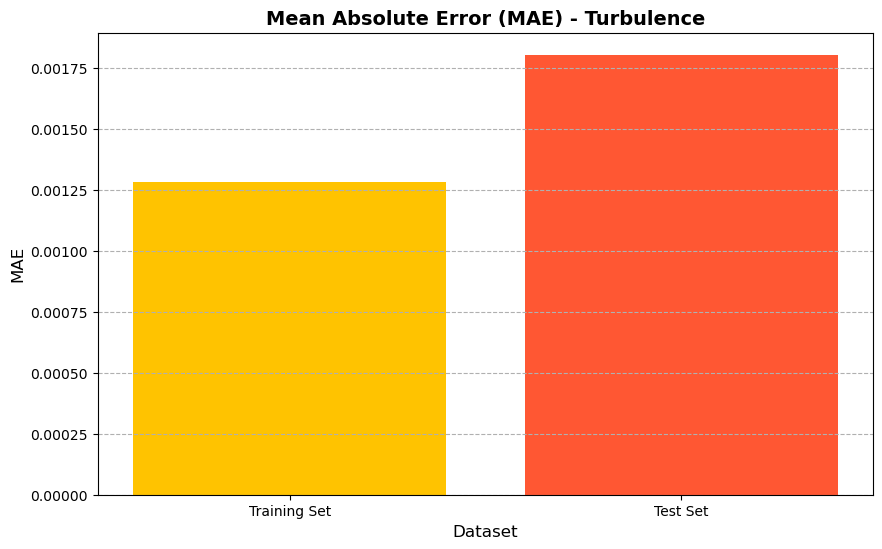

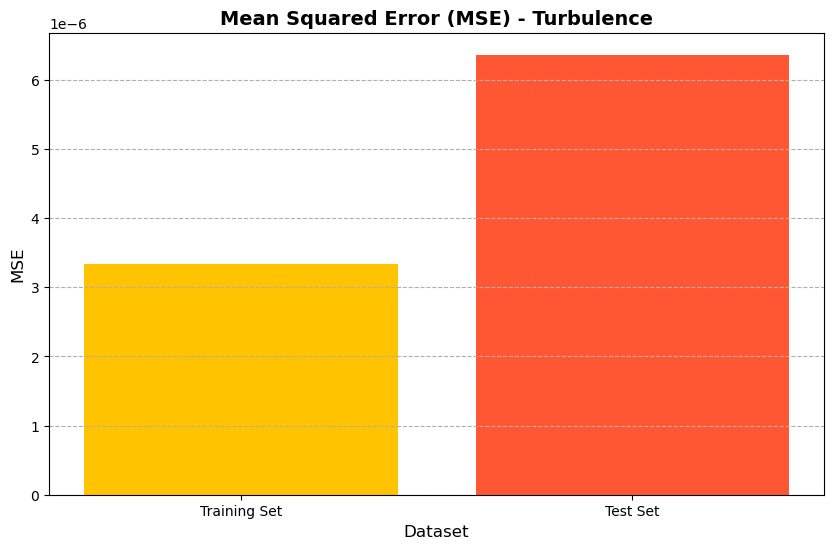

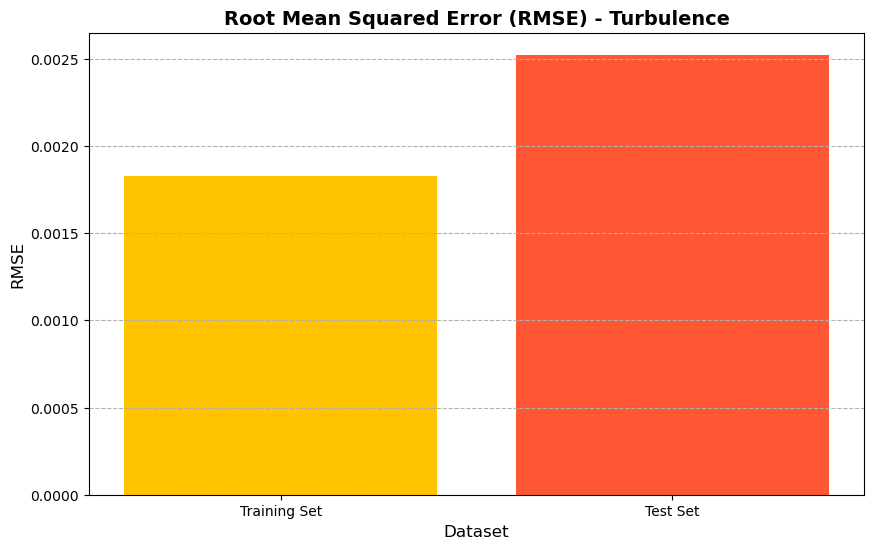

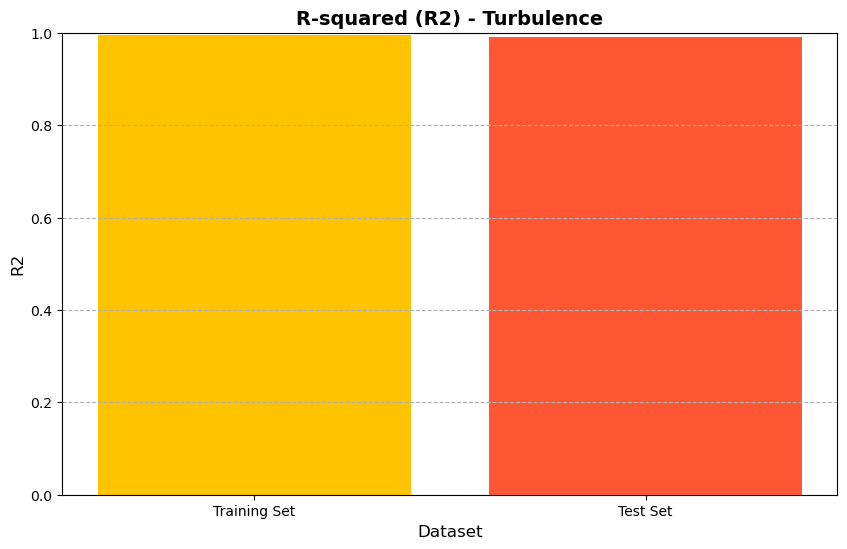

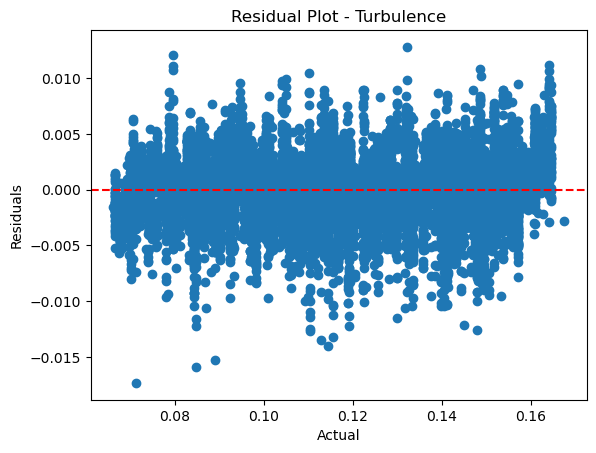

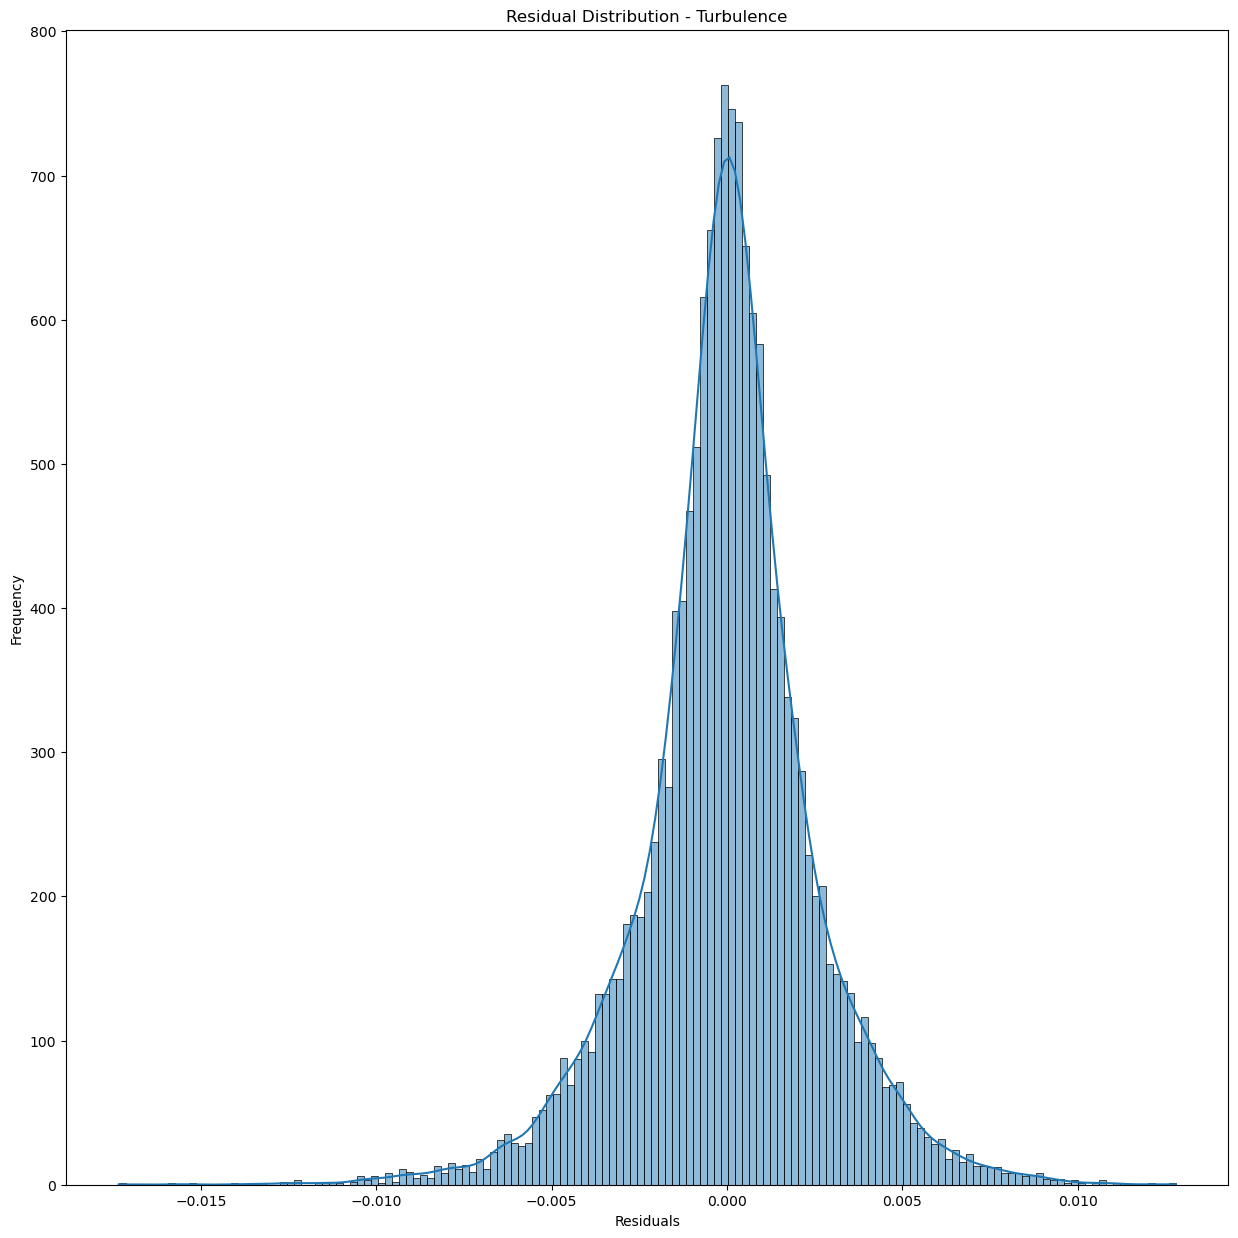

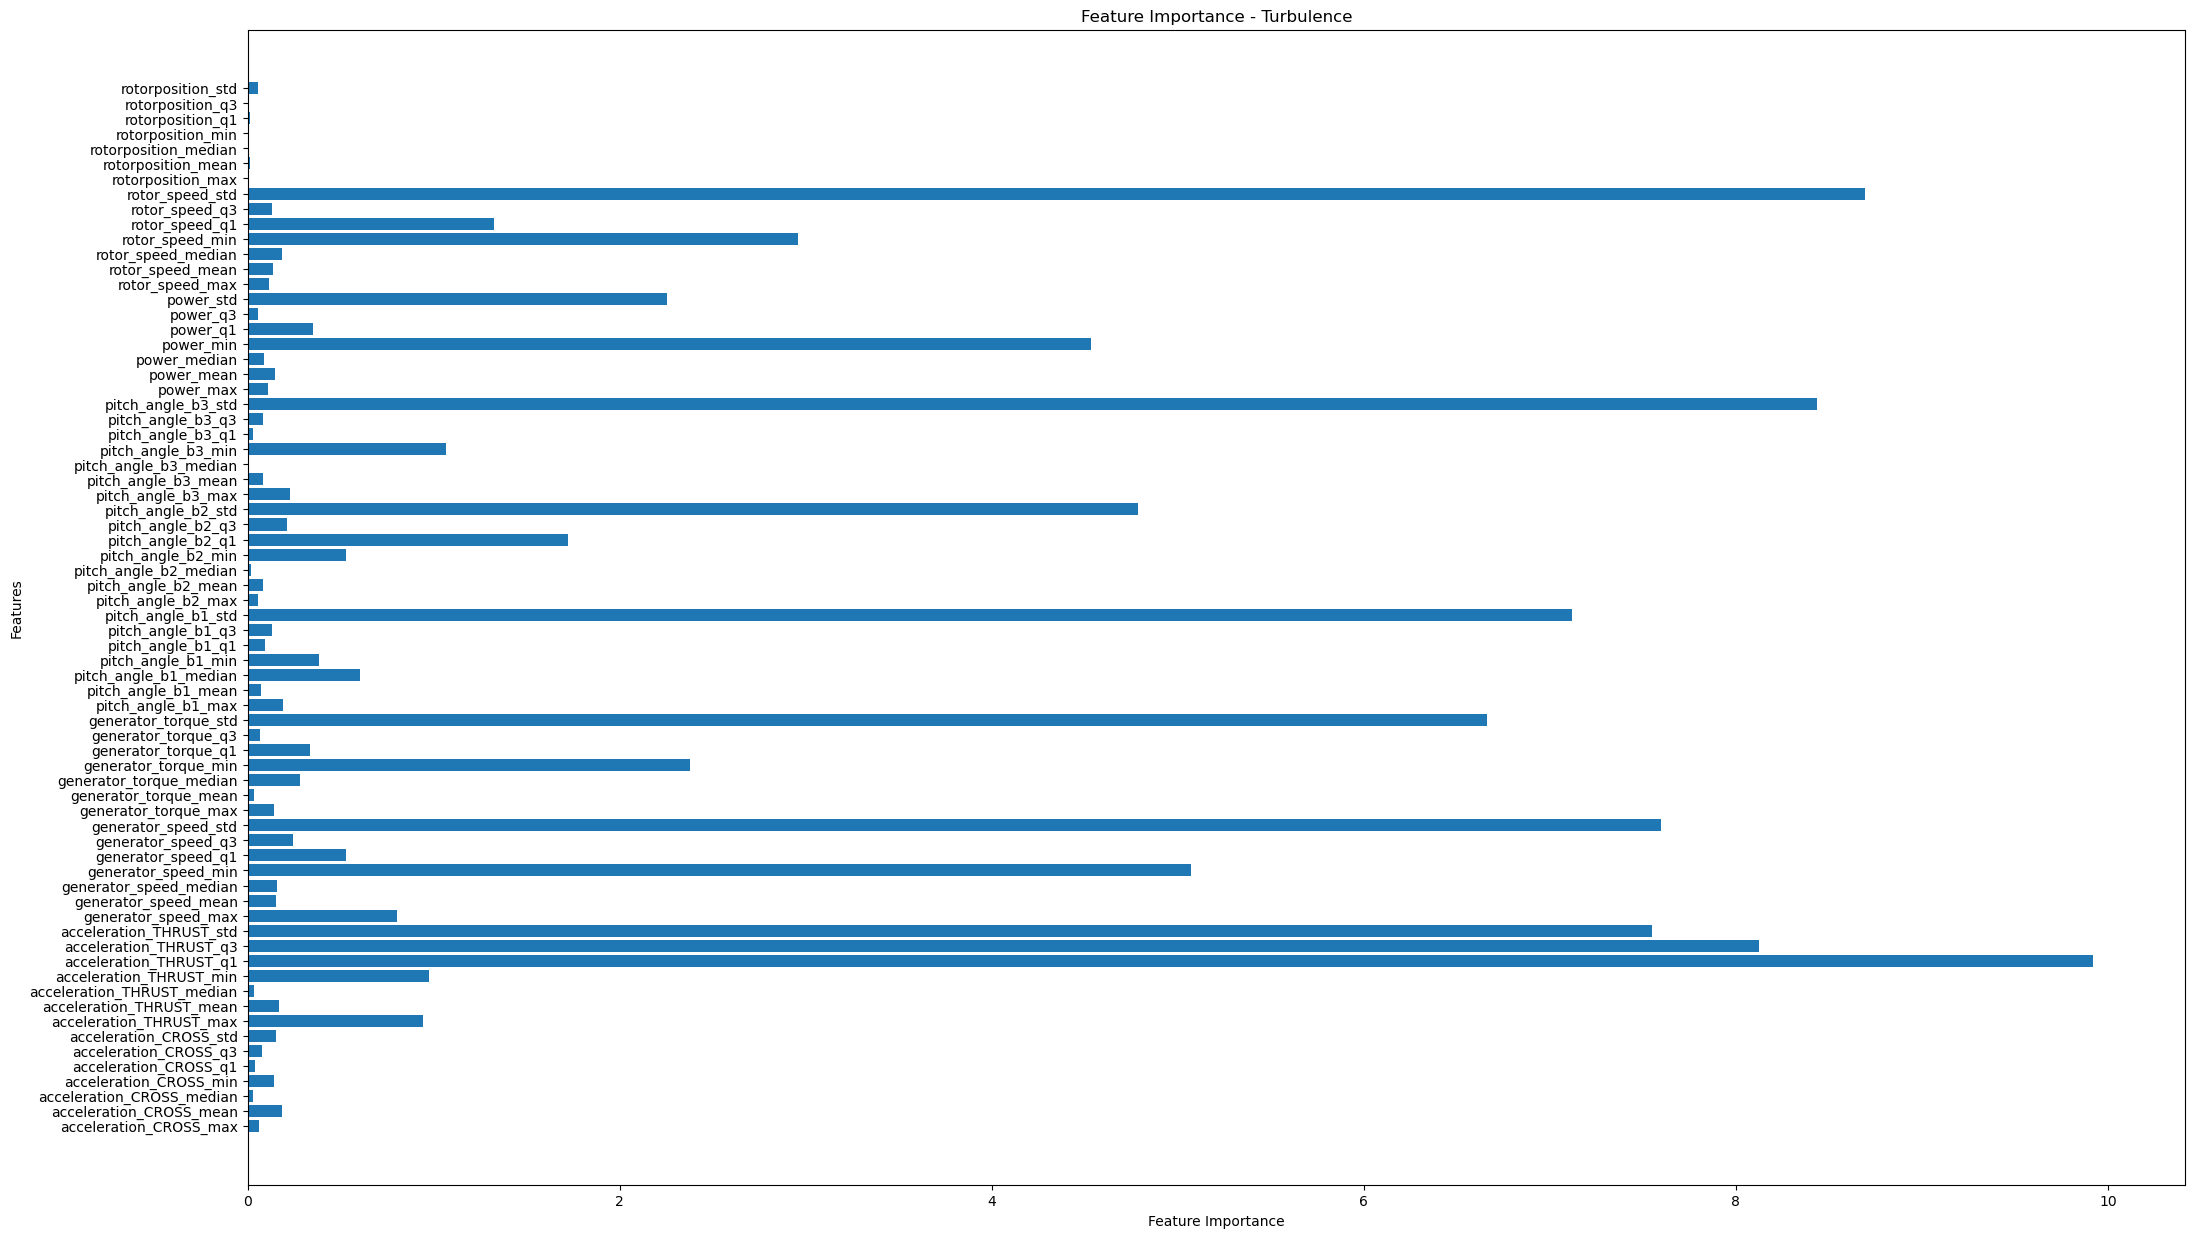

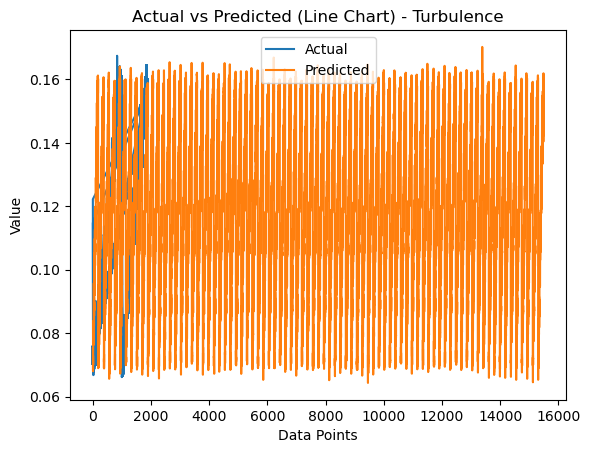

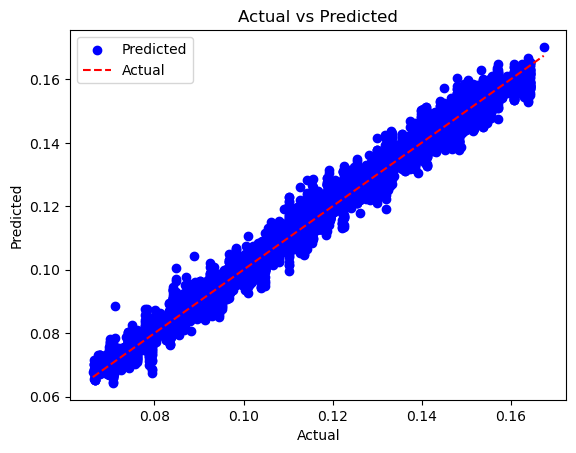

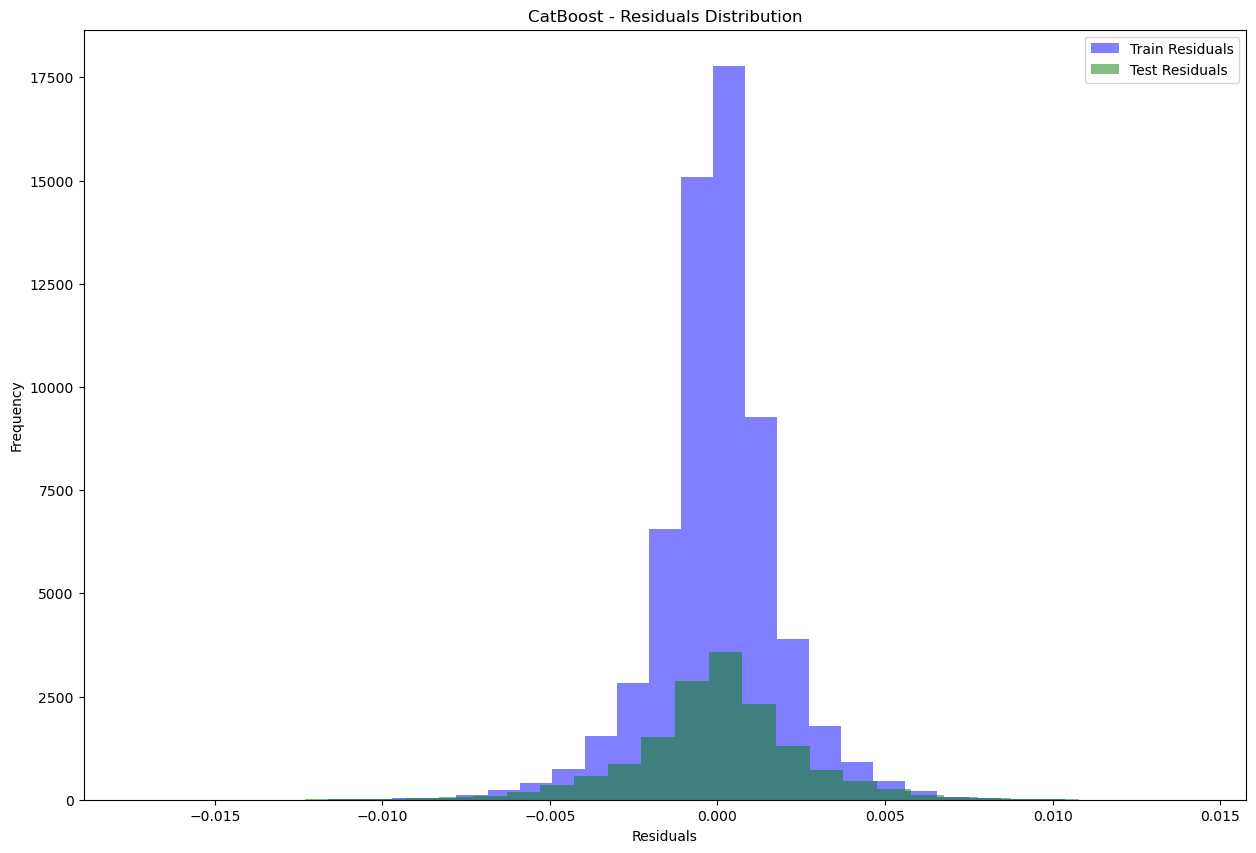

In [6]:
from catboost import CatBoostRegressor

targets = ['wind_speed_mean', 'yaw_error_mean', 'Turbulence']

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    cat_model = CatBoostRegressor()
    cat_model.fit(X_train, y_train)
    
    train_predictions = cat_model.predict(X_train)
    test_predictions = cat_model.predict(X_test)
    
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
    train_r2 = r2_score(y_train, train_predictions)
    
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
    test_r2 = r2_score(y_test, test_predictions)
    
    print("Target Variable:", target_variable)
    print("Training MAE:", train_mae)
    print("Training MSE:", train_mse)
    print("Training RMSE:", train_rmse)
    print("Training R2:", train_r2)
    print()
    print("Test MAE:", test_mae)
    print("Test MSE:", test_mse)
    print("Test RMSE:", test_rmse)
    print("Test R2:", test_r2)
    print()
    
    mae_values = [train_mae, test_mae]
    mse_values = [train_mse, test_mse]
    rmse_values = [train_rmse, test_rmse]
    r2_values = [train_r2, test_r2]

    labels = ['Training Set', 'Test Set']
    x = np.arange(len(labels))

    plt.figure(figsize=(10, 6))
    plt.bar(x, mae_values, color=['#FFC300', '#FF5733'])
    plt.xticks(x, labels)
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('MAE', fontsize=12)
    plt.title('Mean Absolute Error (MAE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
    plt.ylim(bottom=0)
    plt.grid(axis='y', linestyle='--')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(x, mse_values, color=['#FFC300', '#FF5733'])
    plt.xticks(x, labels)
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.title('Mean Squared Error (MSE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
    plt.ylim(bottom=0)
    plt.grid(axis='y', linestyle='--')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(x, rmse_values, color=['#FFC300', '#FF5733'])
    plt.xticks(x, labels)
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('RMSE', fontsize=12)
    plt.title('Root Mean Squared Error (RMSE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
    plt.ylim(bottom=0)
    plt.grid(axis='y', linestyle='--')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(x, r2_values, color=['#FFC300', '#FF5733'])
    plt.xticks(x, labels)
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('R2', fontsize=12)
    plt.title('R-squared (R2) - {}'.format(target_variable), fontsize=14, fontweight='bold')
    plt.ylim(top=1)
    plt.grid(axis='y', linestyle='--')
    plt.show()
    
    residuals = y_test - test_predictions

    plt.scatter(y_test, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Residuals')
    plt.title('Residual Plot - {}'.format(target_variable))
    plt.show()

    plt.figure(figsize=(15, 15))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residual Distribution - {}'.format(target_variable))
    plt.show()

    feature_importances = cat_model.feature_importances_
    feature_names = X_train.columns

    plt.figure(figsize=(25, 15))
    plt.barh(feature_names, feature_importances)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance - {}'.format(target_variable))
    plt.show()

    plt.plot(y_test, label='Actual')
    plt.plot(test_predictions, label='Predicted')
    plt.xlabel('Data Points')
    plt.ylabel('Value')
    plt.title('Actual vs Predicted (Line Chart) - {}'.format(target_variable))
    plt.legend()
    plt.show()

    plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.legend()
    plt.show()

    train_residuals = y_train - train_predictions
    test_residuals = y_test - test_predictions

    plt.figure(figsize=(15, 10))
    plt.hist(train_residuals, bins=30, alpha=0.5, label='Train Residuals', color='blue')
    plt.hist(test_residuals, bins=30, alpha=0.5, label='Test Residuals', color='green')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('CatBoost - Residuals Distribution')
    plt.legend()
    plt.show()


